In [5]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/Assignment2
cd /mnt/storage/$USER/jupyternotebooks/Assignment2

Jiangli Gui r0867437

# Data description

Data comes from the paper "Super-enhancer-controlled positive feedback loop BRD4/ERα–RET–ERα promotes ER-positive breast
cancer". 
https://academic.oup.com/nar/article/50/18/10230/6702595

You can find Chip-seq data in GEO ncbi by accession number: GSE186645.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186645

BRD4, a bromodomain protein, was found that functions as a regulator for the ERα-occupied super-enhancers (ERSEs), which will further regulate the transcription of estrogen and estrogen receptor alpha (ERα). Here, Chip-seq analysis was applied to investigate the landscape of the BRD4 and try to understand the whole regulatory cascades for breast cancer.

Here we will just focus on the Chip-seq analysis result

In [19]:
fastq-dump SRR16587391

Read 27731898 spots for SRR16587391
Written 27731898 spots for SRR16587391


In [20]:
fastq-dump SRR16587392

Read 24575276 spots for SRR16587392
Written 24575276 spots for SRR16587392


In [21]:
ls

SRR16587391.fastq  SRR16587392.fastq


## Quality check

In [22]:
fastqc SRR16587391.fastq

Started analysis of SRR16587391.fastq
Approx 5% complete for SRR16587391.fastq
Approx 10% complete for SRR16587391.fastq
Approx 15% complete for SRR16587391.fastq
Approx 20% complete for SRR16587391.fastq
Approx 25% complete for SRR16587391.fastq
Approx 30% complete for SRR16587391.fastq
Approx 35% complete for SRR16587391.fastq
Approx 40% complete for SRR16587391.fastq
Approx 45% complete for SRR16587391.fastq
Approx 50% complete for SRR16587391.fastq
Approx 55% complete for SRR16587391.fastq
Approx 60% complete for SRR16587391.fastq
Approx 65% complete for SRR16587391.fastq
Approx 70% complete for SRR16587391.fastq
Approx 75% complete for SRR16587391.fastq
Approx 80% complete for SRR16587391.fastq
Approx 85% complete for SRR16587391.fastq
Approx 90% complete for SRR16587391.fastq
Approx 95% complete for SRR16587391.fastq
Analysis complete for SRR16587391.fastq


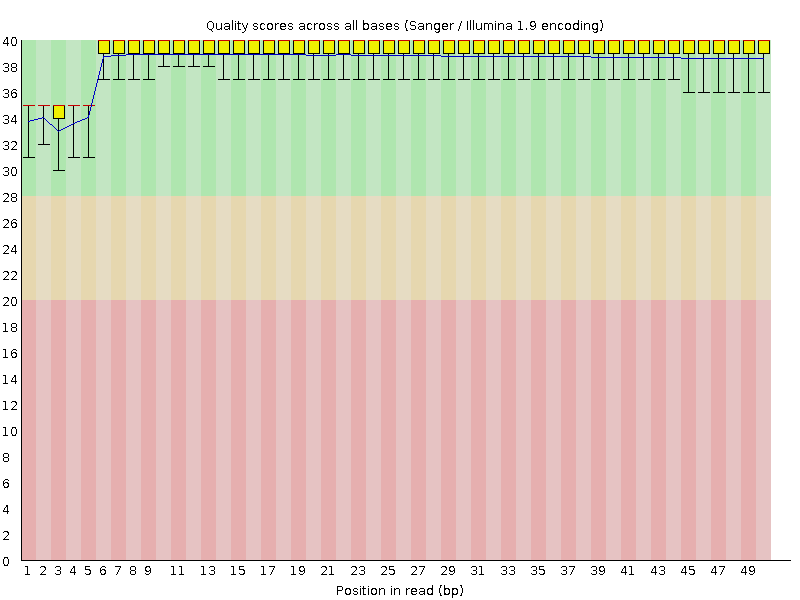

In [23]:
fastqc SRR16587392.fastq

Started analysis of SRR16587392.fastq
Approx 5% complete for SRR16587392.fastq
Approx 10% complete for SRR16587392.fastq
Approx 15% complete for SRR16587392.fastq
Approx 20% complete for SRR16587392.fastq
Approx 25% complete for SRR16587392.fastq
Approx 30% complete for SRR16587392.fastq
Approx 35% complete for SRR16587392.fastq
Approx 40% complete for SRR16587392.fastq
Approx 45% complete for SRR16587392.fastq
Approx 50% complete for SRR16587392.fastq
Approx 55% complete for SRR16587392.fastq
Approx 60% complete for SRR16587392.fastq
Approx 65% complete for SRR16587392.fastq
Approx 70% complete for SRR16587392.fastq
Approx 75% complete for SRR16587392.fastq
Approx 80% complete for SRR16587392.fastq
Approx 85% complete for SRR16587392.fastq
Approx 90% complete for SRR16587392.fastq
Approx 95% complete for SRR16587392.fastq
Analysis complete for SRR16587392.fastq


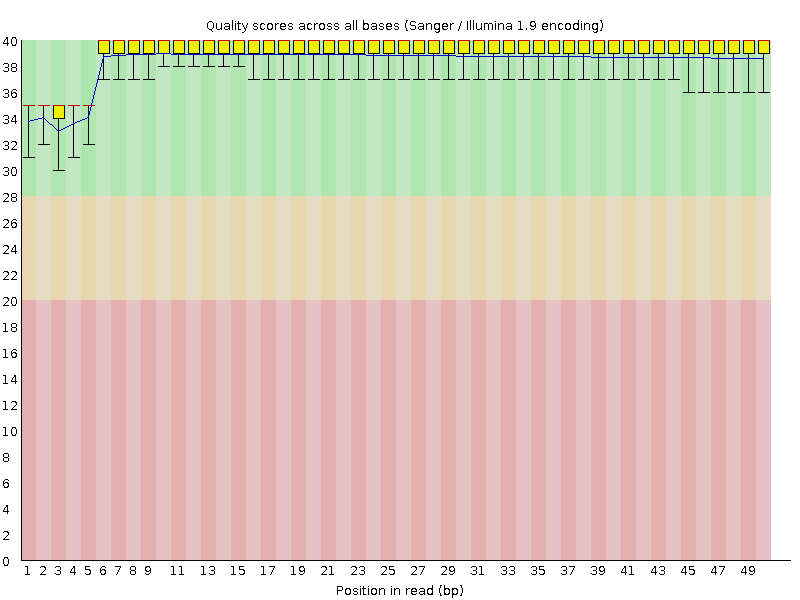

In [24]:
ls -lt | head

total 9314524
-rw-r--r-- 1 r0867437 domain users     716560 Dec 15 17:17 SRR16587392_fastqc.html
-rw-r--r-- 1 r0867437 domain users     481871 Dec 15 17:17 SRR16587392_fastqc.zip
-rw-r--r-- 1 r0867437 domain users     730249 Dec 15 17:16 SRR16587391_fastqc.html
-rw-r--r-- 1 r0867437 domain users     501387 Dec 15 17:16 SRR16587391_fastqc.zip
-rw-r--r-- 1 r0867437 domain users 4477406372 Dec 15 17:02 SRR16587392.fastq
-rw-r--r-- 1 r0867437 domain users 5058224820 Dec 15 16:56 SRR16587391.fastq


## Alignment of BRD4-E2-MCF7 ChIP-seq reads

In [25]:
bowtie2 -x /mnt/storage/data/resources/genomes/hg38/bowtie2/hg38 SRR16587391.fastq -S ChIP_BRD4.sam

27731898 reads; of these:
  27731898 (100.00%) were unpaired; of these:
    505670 (1.82%) aligned 0 times
    19707370 (71.06%) aligned exactly 1 time
    7518858 (27.11%) aligned >1 times
98.18% overall alignment rate


In [26]:
head -500 ChIP_BRD4.sam | tail -5

SRR16587391.39	16	chr2	117969066	42	50M	*	0	0	TTGGGTGTGGACGGAAGCTGTGCCTTGCTTCTAACCAACAGAATACACCN	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIDDD<#	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49A0	YT:Z:UU
SRR16587391.40	16	chr8	96945144	42	50M	*	0	0	AACCAGGGATTGGATGATGAGCAGGACGGCCATGGGCCCTGCTCTCCTGN	IIIIIHIIIIIIIHIIIIIHHIIIIIIIIIIIIIIIIIIIIIIIIDDD<#	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49G0	YT:Z:UU
SRR16587391.41	16	chr4	125028607	25	50M	*	0	0	TTTTTAAAATCATCAGATCTCATGAGACTTATTCACTTTCACAAGAACAN	IIIIIIIIIHIIIIIIIIIIIIIIHIIIIIIIIIIIHIHIIIIIIDDD<#	AS:i:-1	XS:i:-18	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49G0	YT:Z:UU
SRR16587391.42	16	chr16	25382719	42	50M	*	0	0	GTAAGTAAAAATAAACTGTGGTACATCCCTTTTATGAAATACTACTCAGN	HD<1HCECHEHHG@HHHE?CEEFED1FHFC?HEHGCEEHIHGFFD0<00#	AS:i:-1	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49C0	YT:Z:UU
SRR16587391.43	0	chr16_KI270853v1_alt	1447267	1	50M	*	0	0	NAGGGCAGGGGAAGGGGAATTGATATTTGTTGAAGGCCTGCACAGTACTA	#<DD@HHIIIIGHHG=CFHEEHHIIIIHHIIEHIHIEEHHIHHHIHH

In [27]:
samtools view -S -b ChIP_BRD4.sam > ChIP_BRD4.bam

In [28]:
samtools view -c ChIP_BRD4.bam

27731898


In [29]:
samtools flags UNMAP,SECONDARY

0x104	260	UNMAP,SECONDARY


In [30]:
samtools view -c -F 260 ChIP_BRD4.bam

27226228


In [31]:
samtools sort -O bam -o ChIP_BRD4.sorted.bam ChIP_BRD4.bam

[bam_sort_core] merging from 7 files and 1 in-memory blocks...


In [32]:
samtools index ChIP_BRD4.sorted.bam

## Alignment of the control data ("input")

In [33]:
bowtie2 -x /mnt/storage/data/resources/genomes/hg38/bowtie2/hg38 SRR16587392.fastq -S ChIP_BRD4_input.sam

24575276 reads; of these:
  24575276 (100.00%) were unpaired; of these:
    414404 (1.69%) aligned 0 times
    17365152 (70.66%) aligned exactly 1 time
    6795720 (27.65%) aligned >1 times
98.31% overall alignment rate


In [34]:
samtools view -S -b ChIP_BRD4_input.sam > ChIP_BRD4_input.bam

In [35]:
samtools sort -O bam -o ChIP_BRD4_input.sorted.bam ChIP_BRD4_input.bam

[bam_sort_core] merging from 6 files and 1 in-memory blocks...


In [36]:
samtools index ChIP_BRD4_input.sorted.bam

It was reported by paper that "The effects of BRD4 on the activation of estrogen-induced genes in the vicinity of ERSEs including PGR, GREB1, TFF1, SMAD7, SIAH2, CCND1 and MYC were demonstrated by RT–qPCR analysis".

Here in the igv, after mapping the reads on the human genome, some peaks were found at these genes:TFF1, SIAH2, CCND1 and MYC.

TFF1
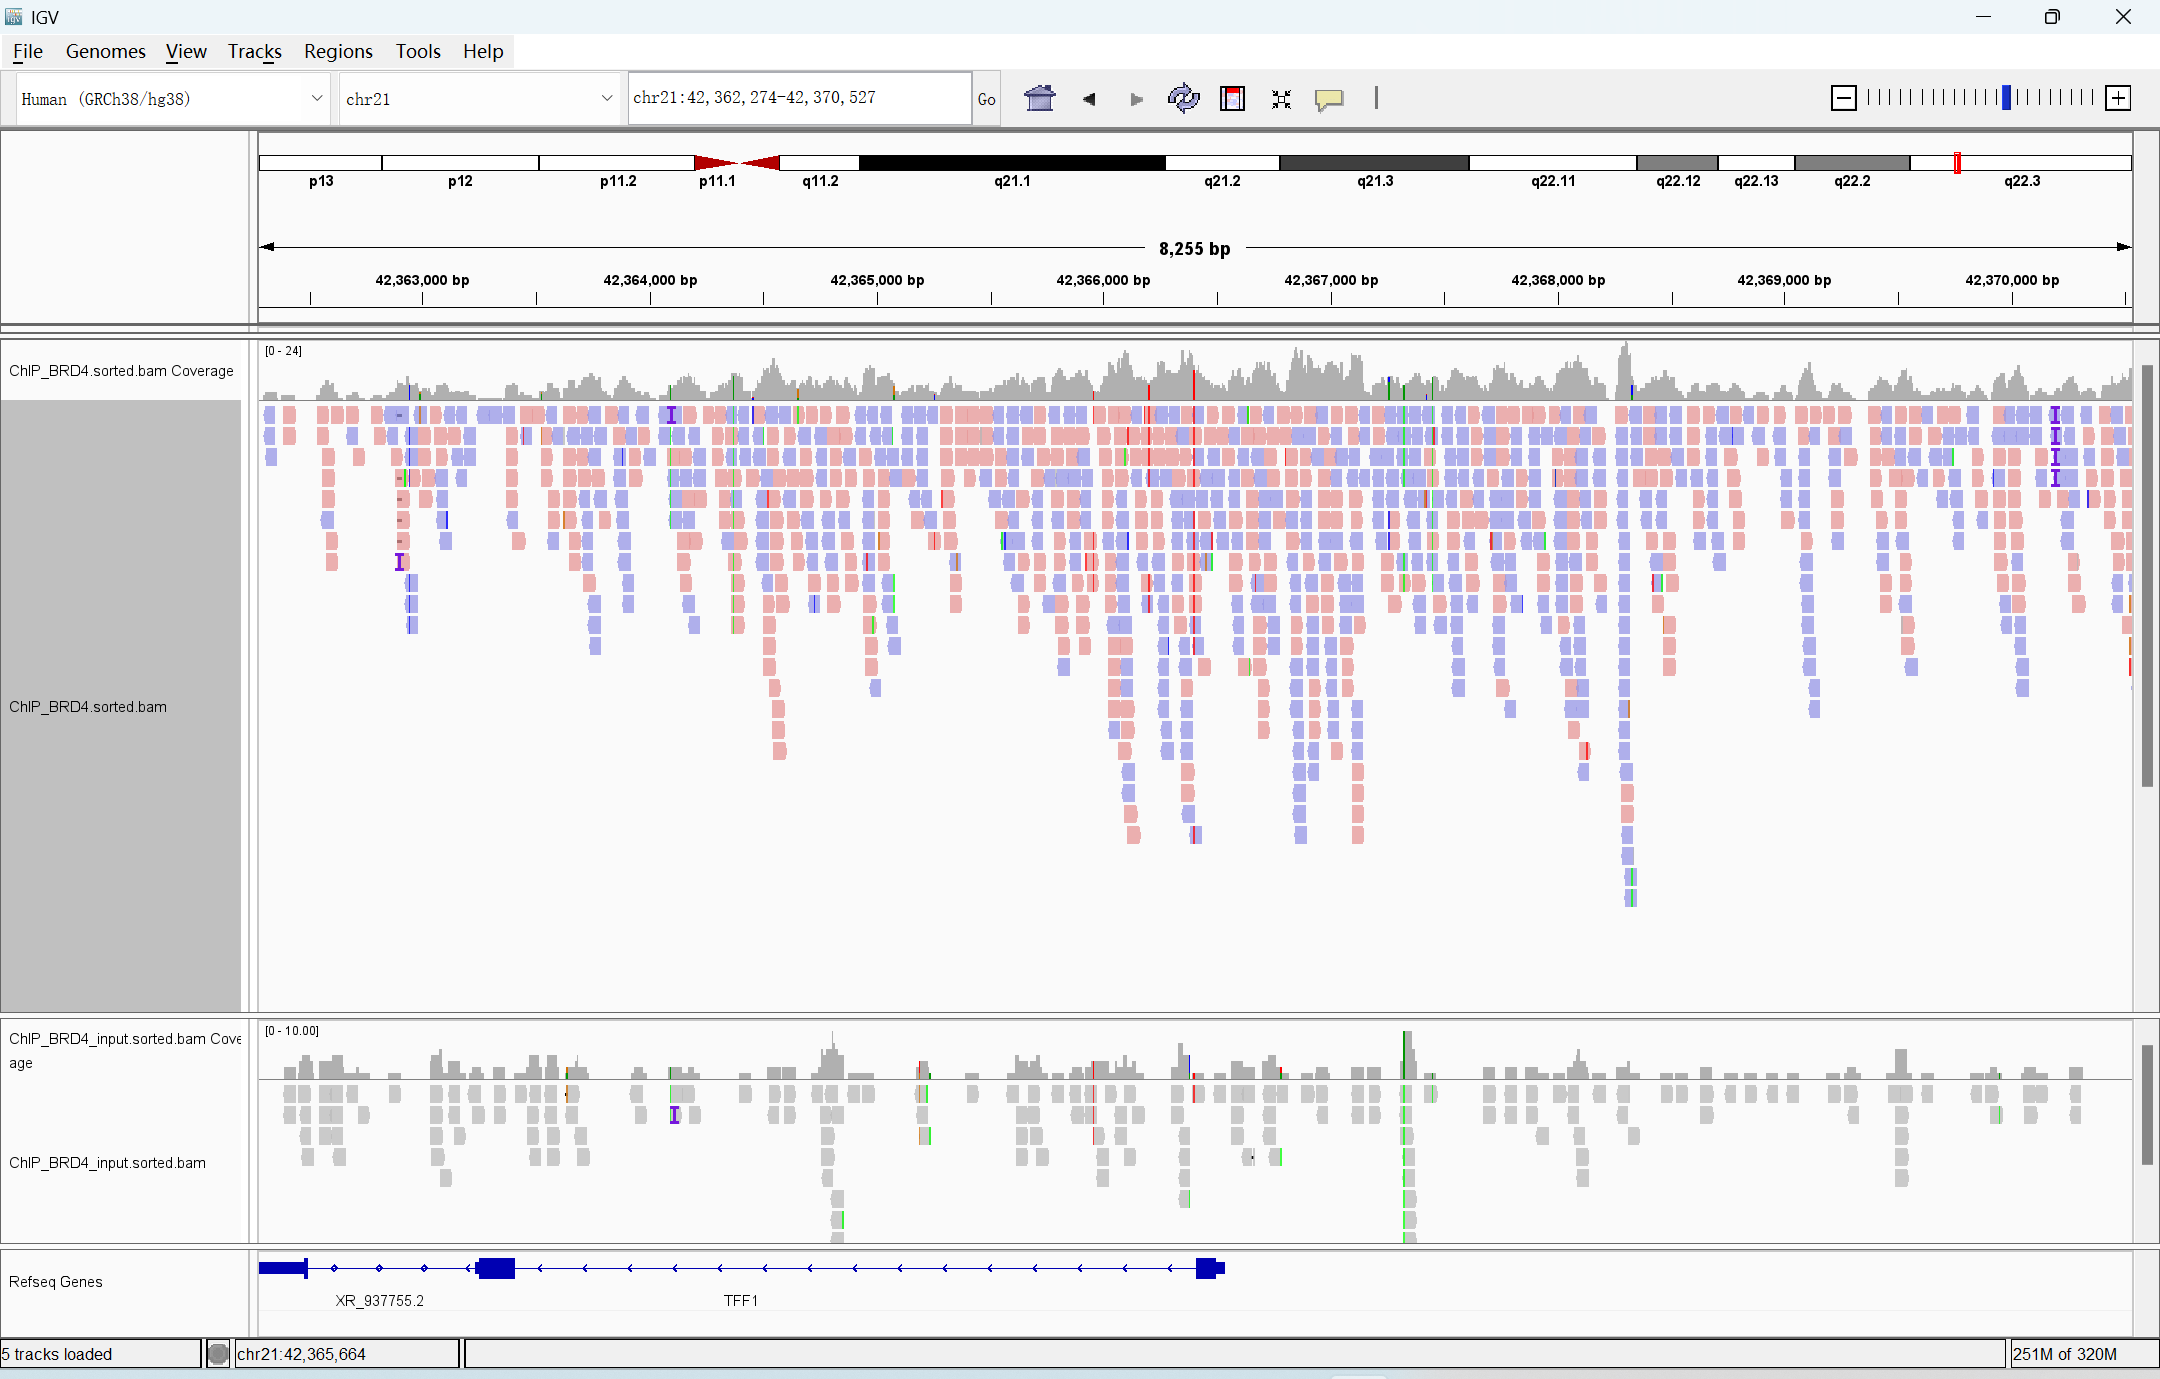

TMPRSS3
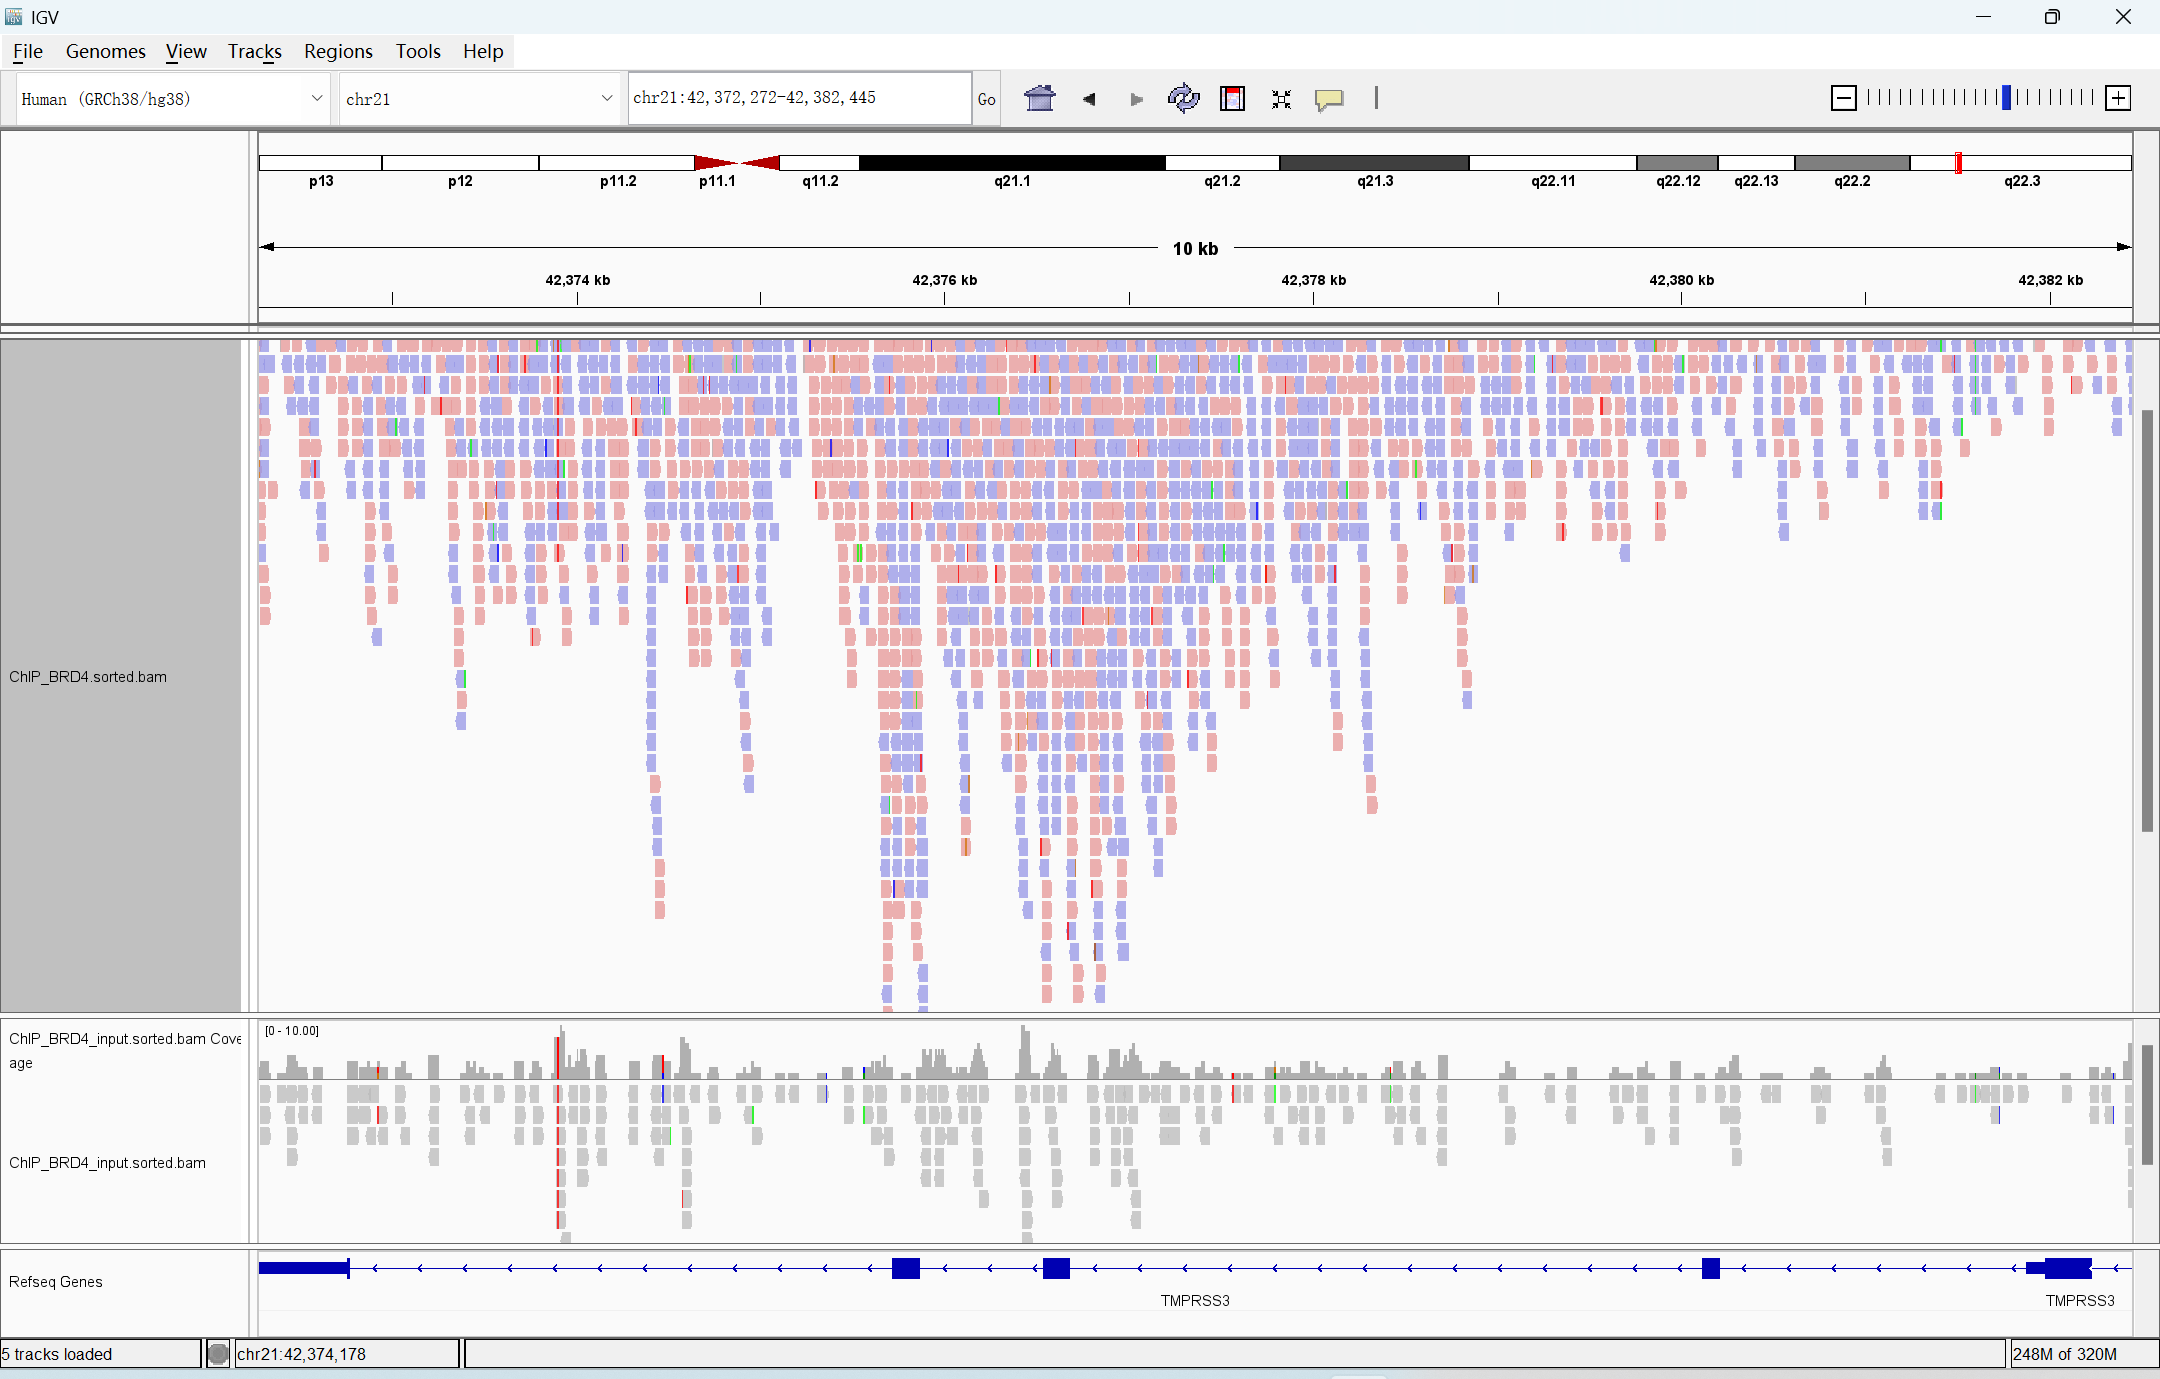

SIAH2
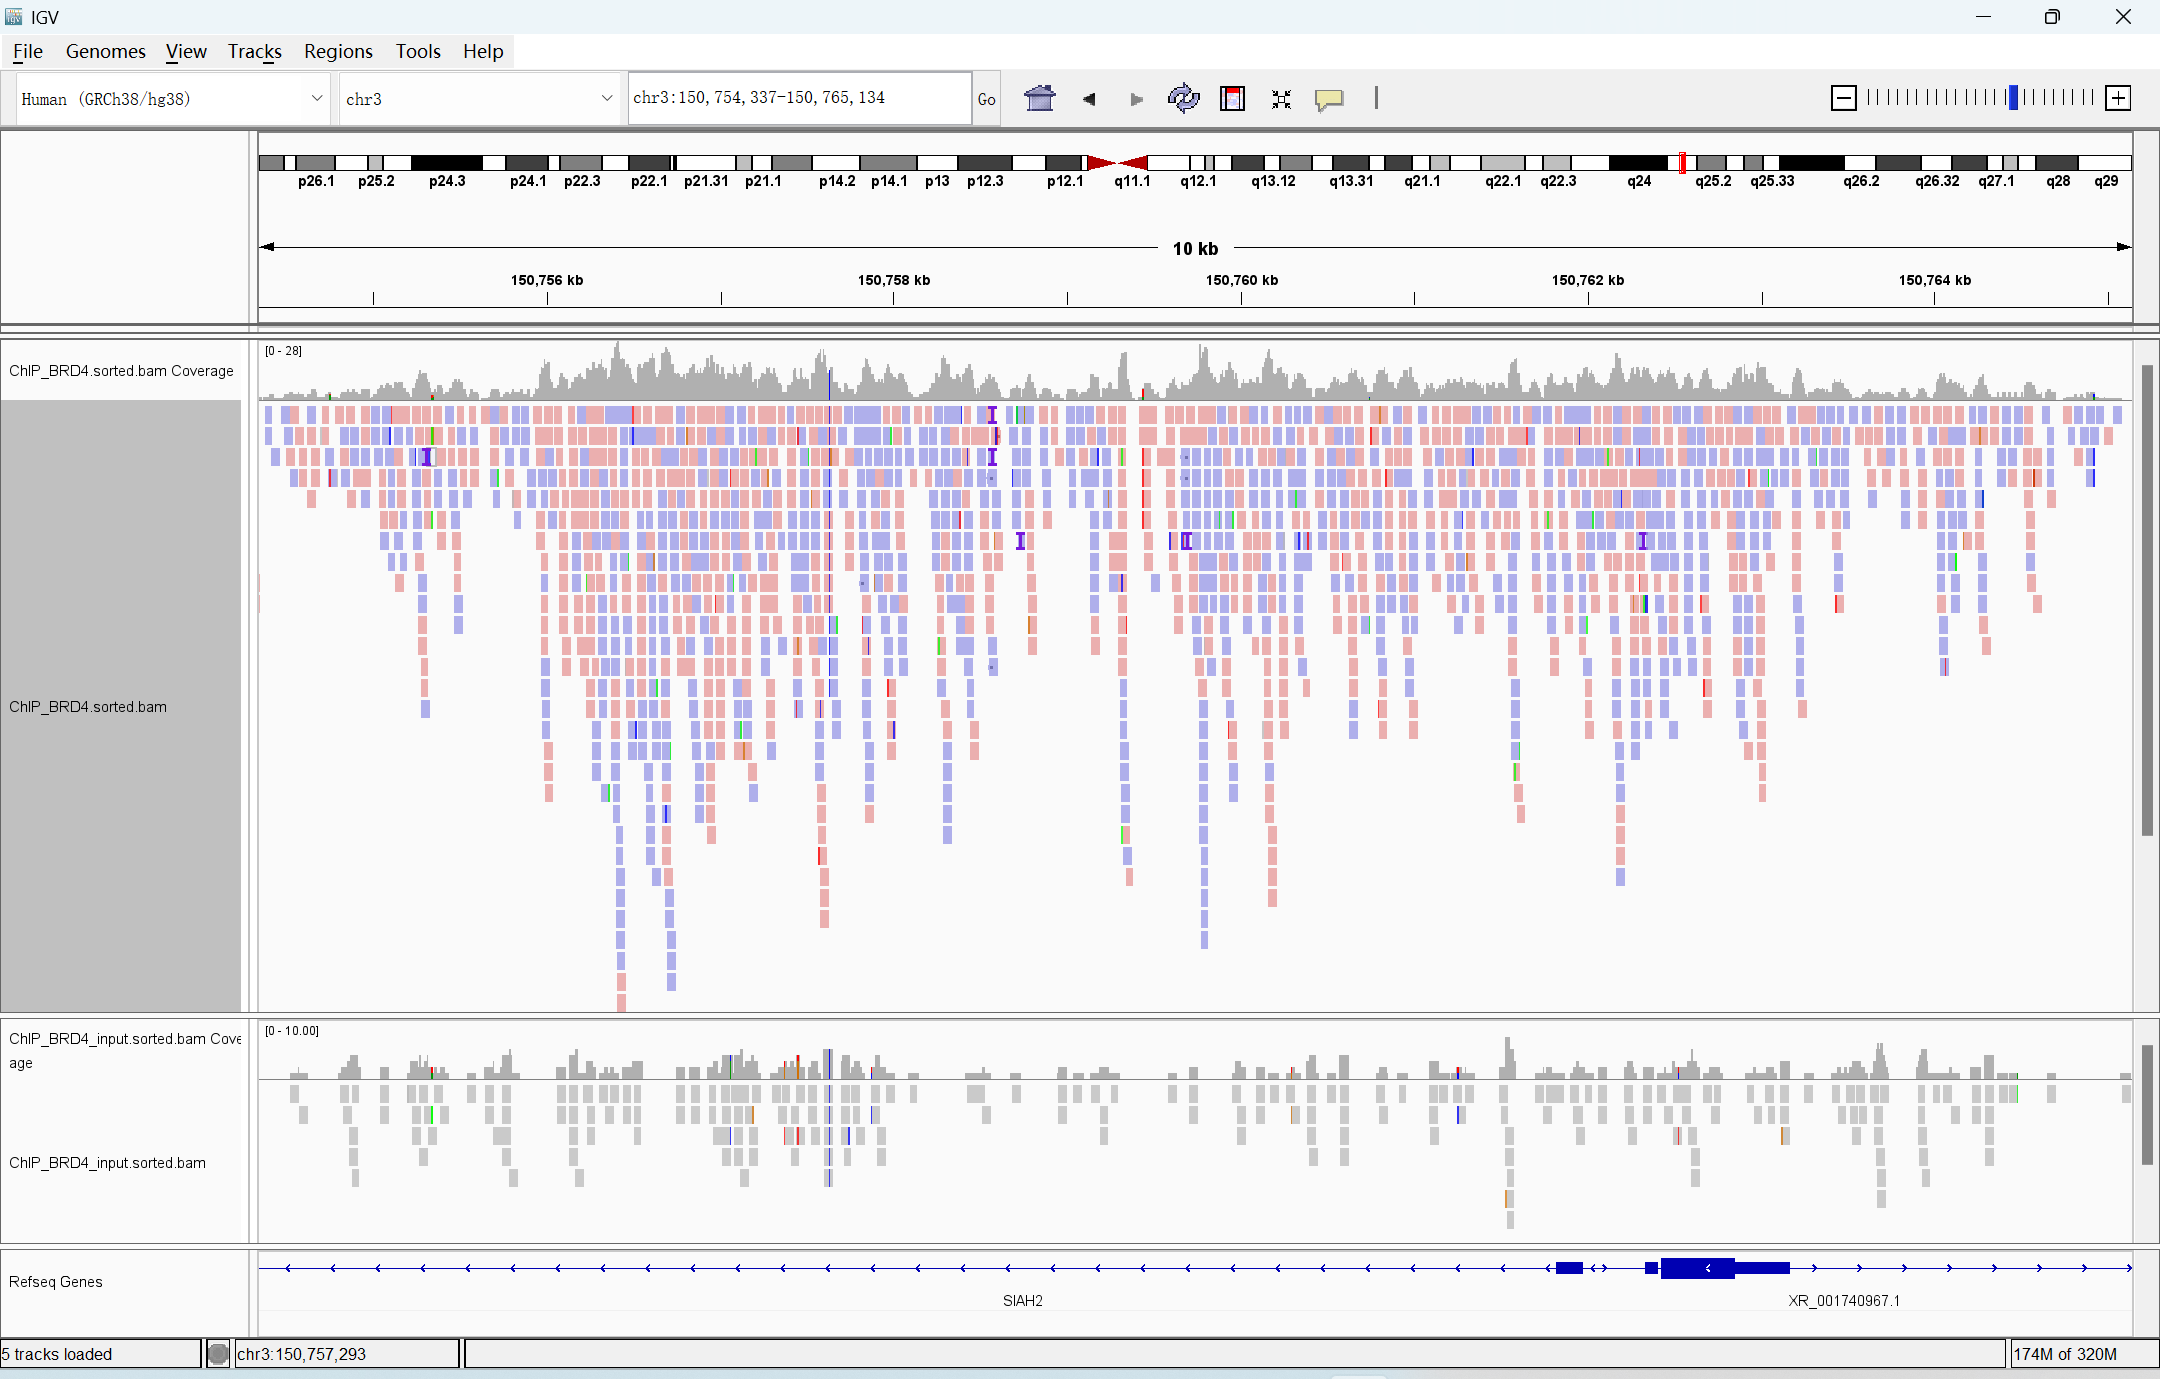

## Genome-wide coverage plots

The size of whole human genome is 3,099,706,404 bp 
https://rgd.mcw.edu/rgdweb/report/genomeInformation/genomeInformation.html?species=Human&mapKey=38&details=true

In [38]:
bamCoverage -b ChIP_BRD4.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 3099706404 -o brd4.bw

normalization: 1x (effective genome size 3099706404)
bamFilesList: ['ChIP_BRD4.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


### integrate big wig result with bam files, also control big wig file downloaded from GEO ncbi(GSE186645) 
Use gene TFF1 position as an example
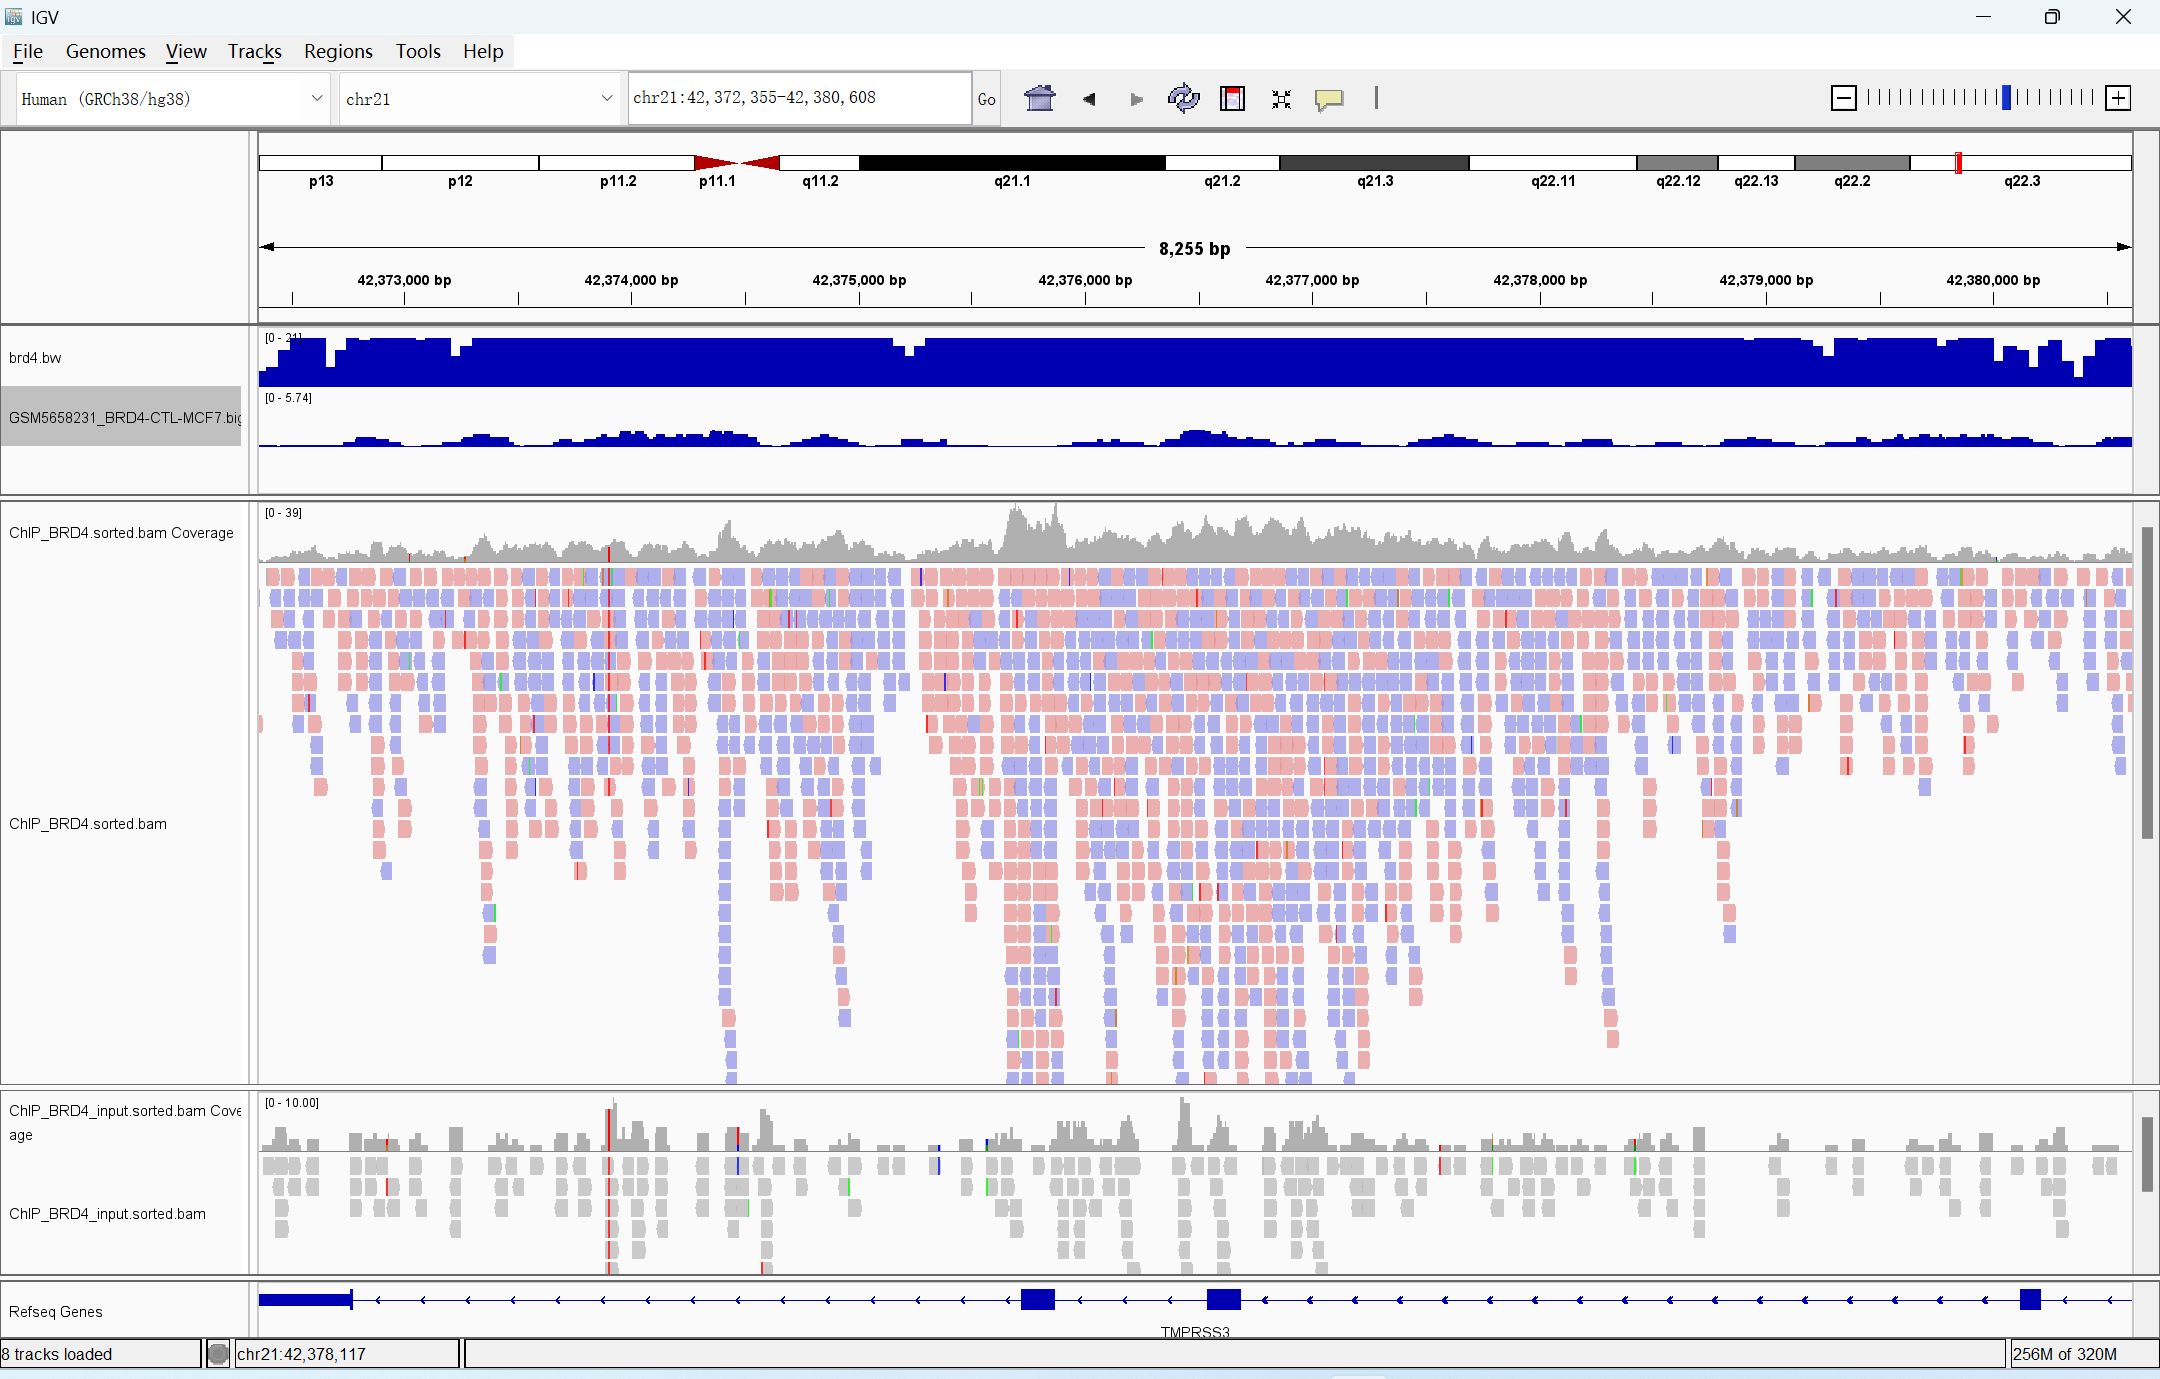

## Peak calling

Here we use 0.001 as the threshold for the false discovery rate, the same as the paper one

In [5]:
macs2 callpeak -t ChIP_BRD4.sorted.bam -c ChIP_BRD4_input.sorted.bam -n brd4 -g hs -q 0.001

INFO  @ Thu, 15 Dec 2022 23:12:29: 
# Command line: callpeak -t ChIP_BRD4.sorted.bam -c ChIP_BRD4_input.sorted.bam -n brd4 -g hs -q 0.001
# ARGUMENTS LIST:
# name = brd4
# format = AUTO
# ChIP-seq file = ['ChIP_BRD4.sorted.bam']
# control file = ['ChIP_BRD4_input.sorted.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 1.00e-03
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Thu, 15 Dec 2022 23:12:29: #1 read tag files... 
INFO  @ Thu, 15 Dec 2022 23:12:29: #1 read treatment tags... 
INFO  @ Thu, 15 Dec 2022 23:12:29: Detected format is: BAM 
INFO  @ Thu, 15 Dec 2022 23:12:29: * Input file is gzipped. 
INFO  @ Thu, 15 Dec 2022 23:12:32

In [6]:
ls -lt | head

total 24859708
-rw-r--r-- 1 r0867437 domain users      45505 Dec 16 01:47 brd4_summits.bed
-rw-r--r-- 1 r0867437 domain users      71269 Dec 16 01:47 brd4_peaks.narrowPeak
-rw-r--r-- 1 r0867437 domain users      82418 Dec 16 01:47 brd4_peaks.xls
-rw-r--r-- 1 r0867437 domain users      98904 Dec 15 23:14 brd4_model.r
-rw-r--r-- 1 r0867437 domain users  128013753 Dec 15 21:14 brd4.bw
-rw-r--r-- 1 r0867437 domain users    2792504 Dec 15 21:06 ChIP_BRD4_input.sorted.bam.bai
-rw-r--r-- 1 r0867437 domain users  985315956 Dec 15 21:06 ChIP_BRD4_input.sorted.bam
-rw-r--r-- 1 r0867437 domain users 1213490378 Dec 15 21:02 ChIP_BRD4_input.bam
-rw-r--r-- 1 r0867437 domain users 5221296322 Dec 15 20:59 ChIP_BRD4_input.sam


In [7]:
cat brd4_peaks.narrowPeak | wc -l

981


In [8]:
cat brd4_peaks.narrowPeak | sort -k9 -gr | head

chr3	150735562	150739033	brd4_peak_702	616	.	14.13606	68.67888	61.69898	1831
chr20	54121272	54130872	brd4_peak_612	556	.	4.19116	62.51098	55.67591	2700
chr6	39268644	39272900	brd4_peak_832	535	.	12.82655	60.29605	53.59190	1164
chr20	54148446	54151505	brd4_peak_618	510	.	5.39339	57.50330	51.08200	1345
chr16	85304618	85307089	brd4_peak_364	479	.	11.11474	54.13040	47.92693	1564
chr3	193878135	193882058	brd4_peak_738	447	.	7.54339	50.79079	44.76657	1928
chr6	39265813	39268398	brd4_peak_831	423	.	11.88039	48.29422	42.39561	1139
chr15	71096240	71097886	brd4_peak_307	392	.	9.57318	44.99152	39.22809	683
chr20	50724736	50731115	brd4_peak_601	379	.	3.06299	43.61897	37.92437	2774
chr20	54194745	54196730	brd4_peak_619	378	.	4.86164	43.57346	37.88054	673
sort: write failed: 'standard output': Broken pipe
sort: write error


### TFF1 region as an example
We can find mang peaks in the region
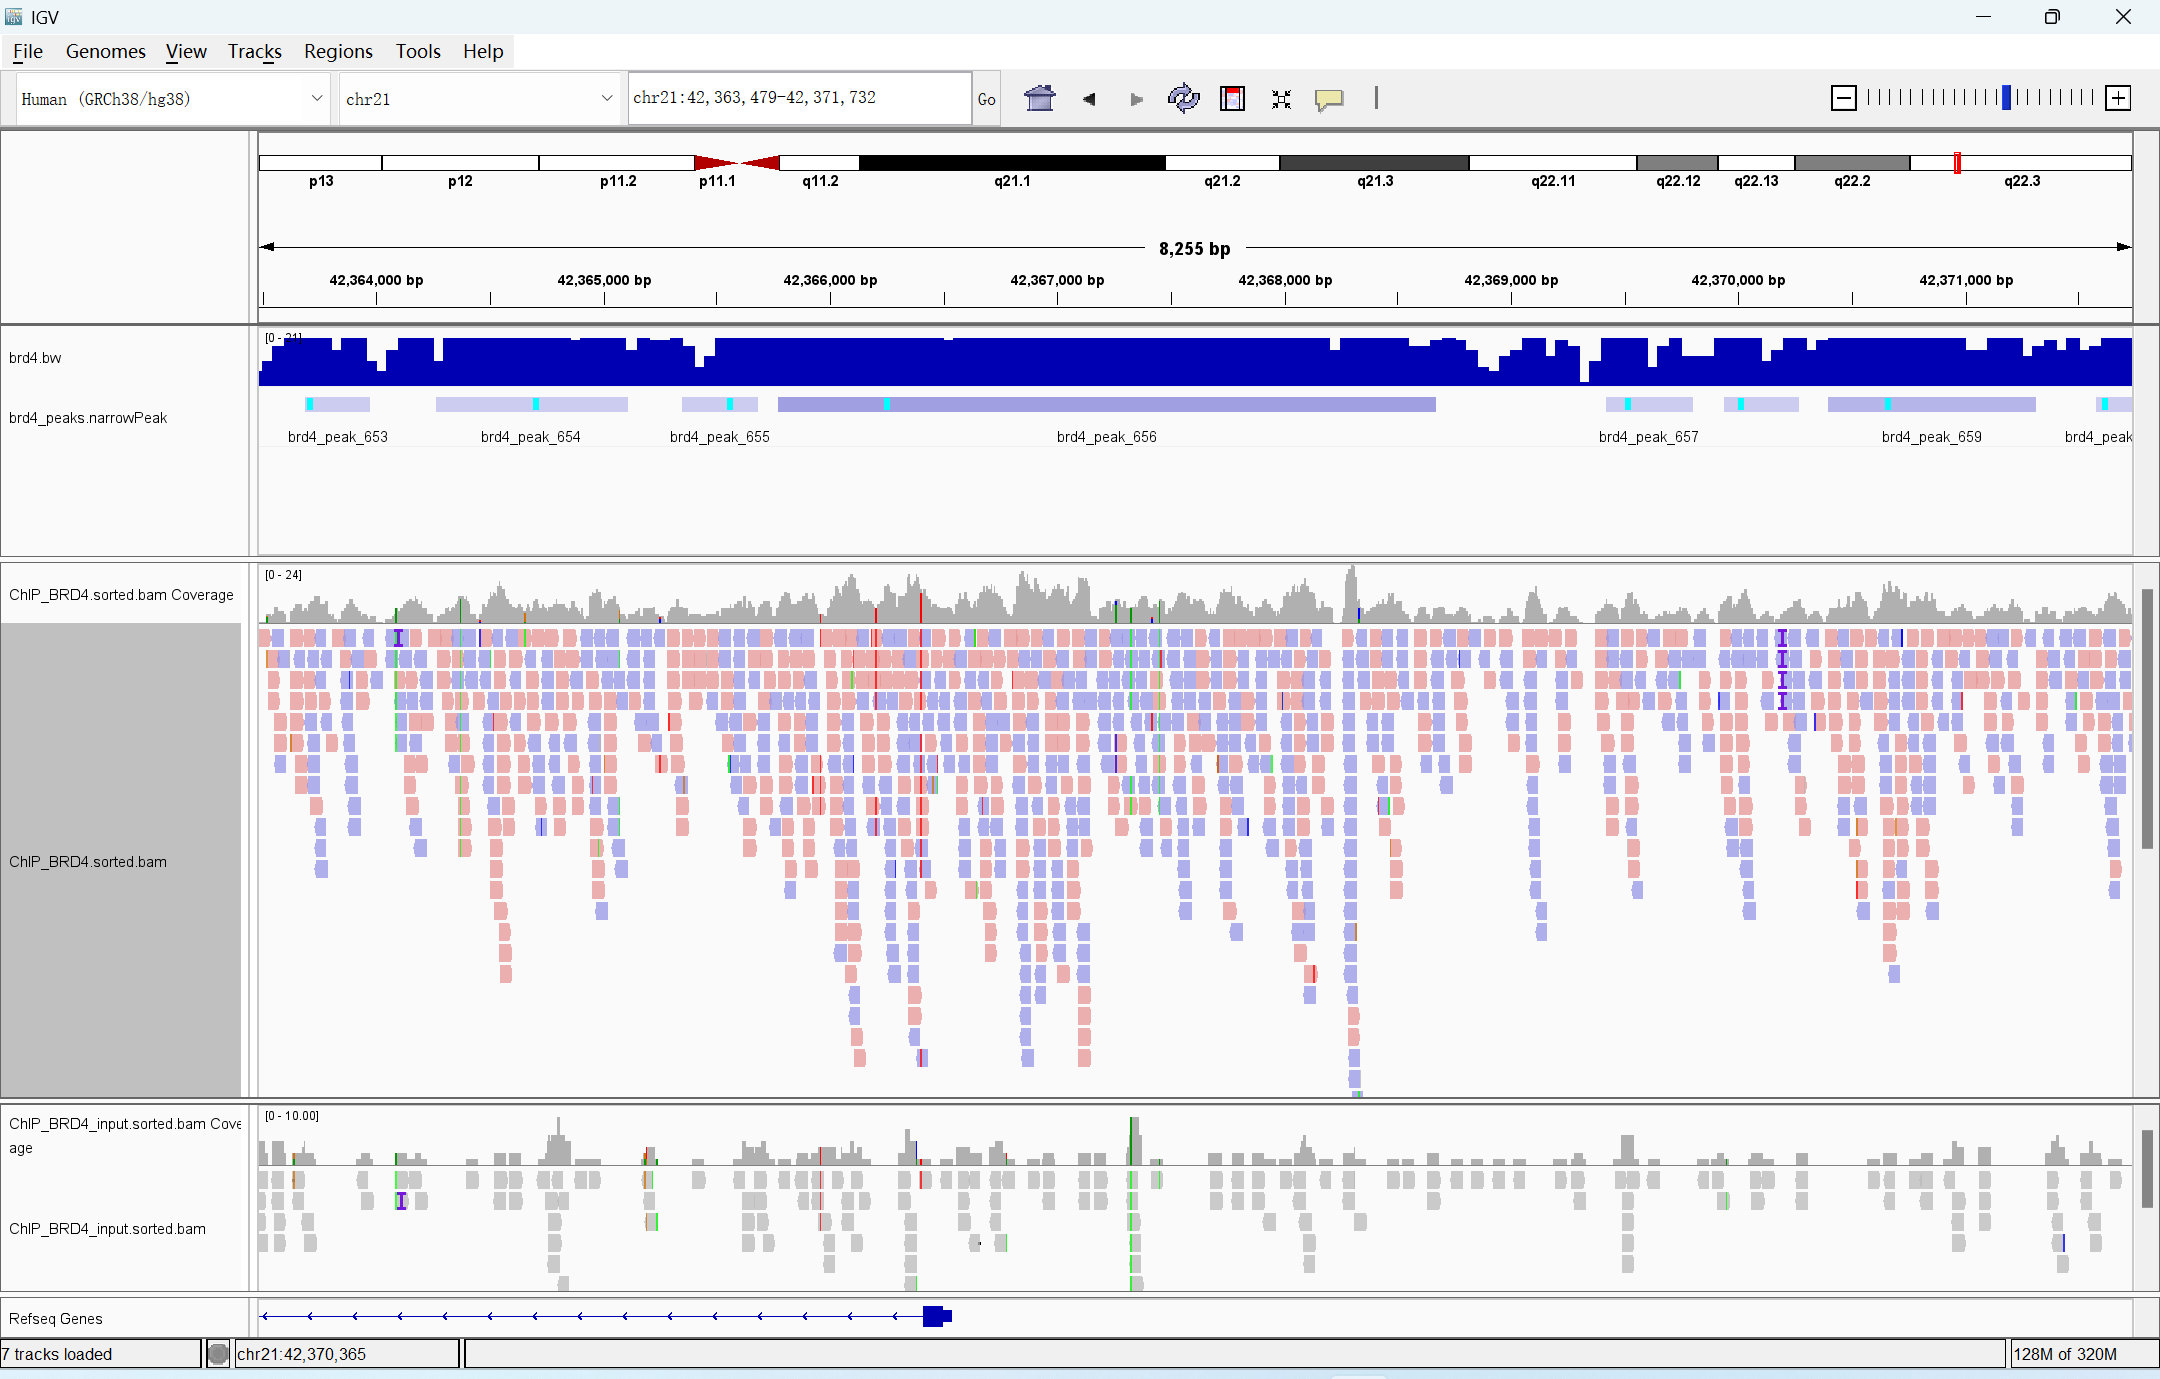

In [9]:
cat brd4_peaks.narrowPeak | cut -f 1-3 | head

chr1	6959536	6959891
chr1	6960247	6961018
chr1	9950412	9950768
chr1	16608283	16608933
chr1	17520669	17521056
chr1	17521316	17521882
chr1	17523105	17523434
chr1	17525099	17525644
chr1	17528694	17529055
chr1	22451963	22452923
cut: write error: Broken pipe


In [10]:
cat brd4_peaks.narrowPeak | cut -f 1-3 > brd4_peaks.bed

In [19]:
computeMatrix reference-point \
    -S brd4.bw \
    -R brd4_peaks.bed \
    --referencePoint center \
    -a 10000 \
    -b 10000 \
    --binSize 5 \
    -out brd4.tab.gz

In [20]:
plotHeatmap \
    -m brd4.tab.gz \
    -out brd4-peaks5.png \
    --heatmapHeight 10  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

### As we can see, BRD4 call various regions in reference genome, it is not a specific regulator for the ERα-occupied super-enhancers (ERSEs) 
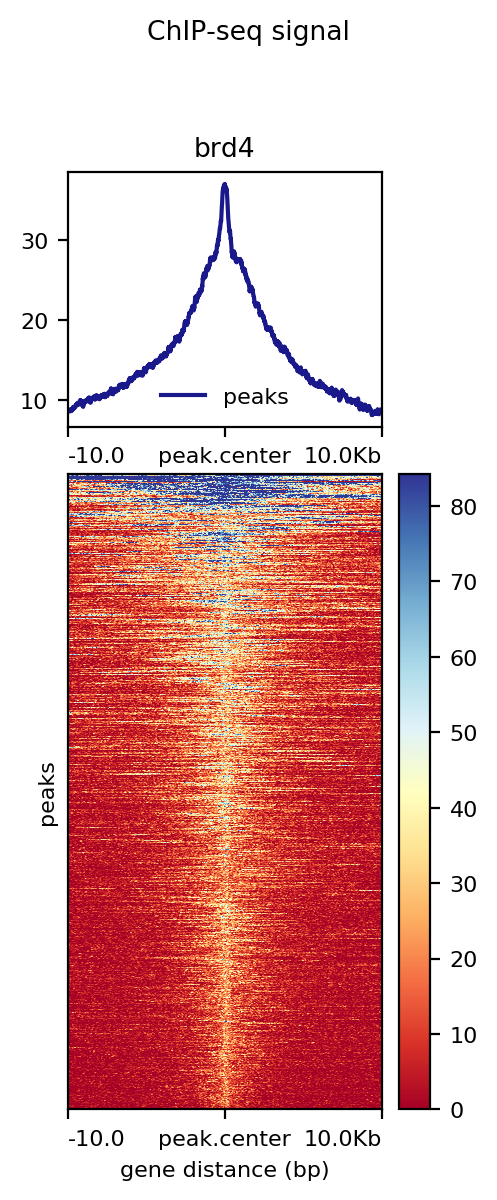

In [21]:
computeMatrix reference-point \
    -S brd4.bw \
    -R brd4_peaks.bed \
    --referencePoint center \
    -a 1000 \
    -b 1000 \
    --binSize 5 \
    -out brd4.tab.gz

In [22]:
plotHeatmap \
    -m brd4.tab.gz \
    -out brd4-peaks5.png \
    --heatmapHeight 10  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

### although there is a top peak shown here at the total range of 2kb, it is not significantly higher than surrounding regions
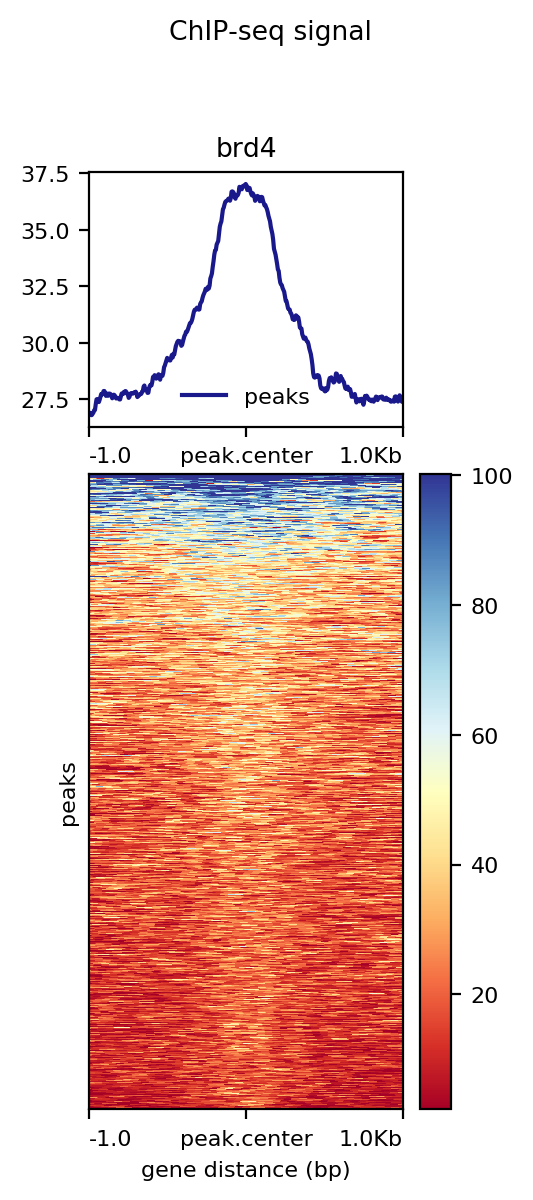

## Modify discovery

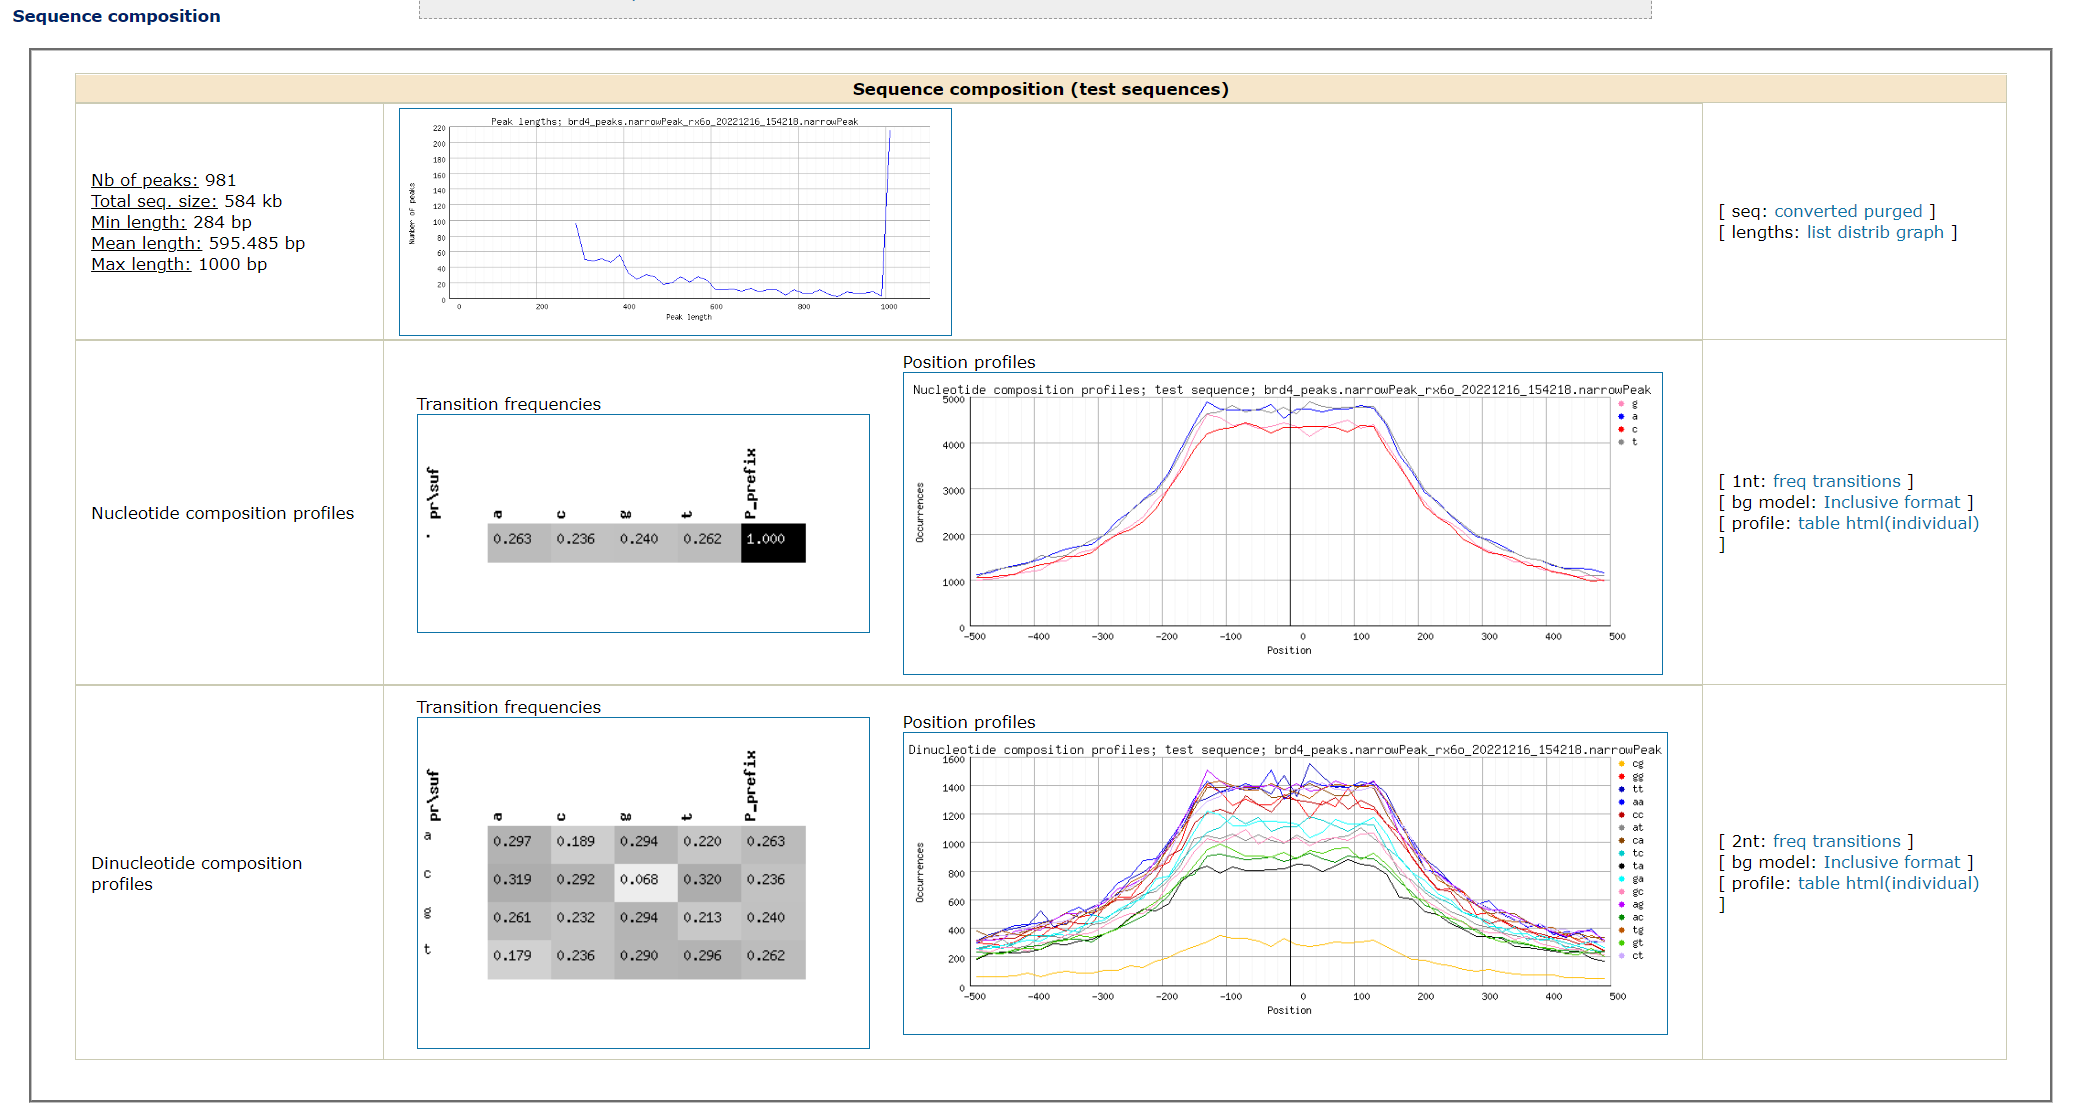

### The first motif only accounts for 20%, further confirms that BRD4 can regulator multiple regions in human genome.
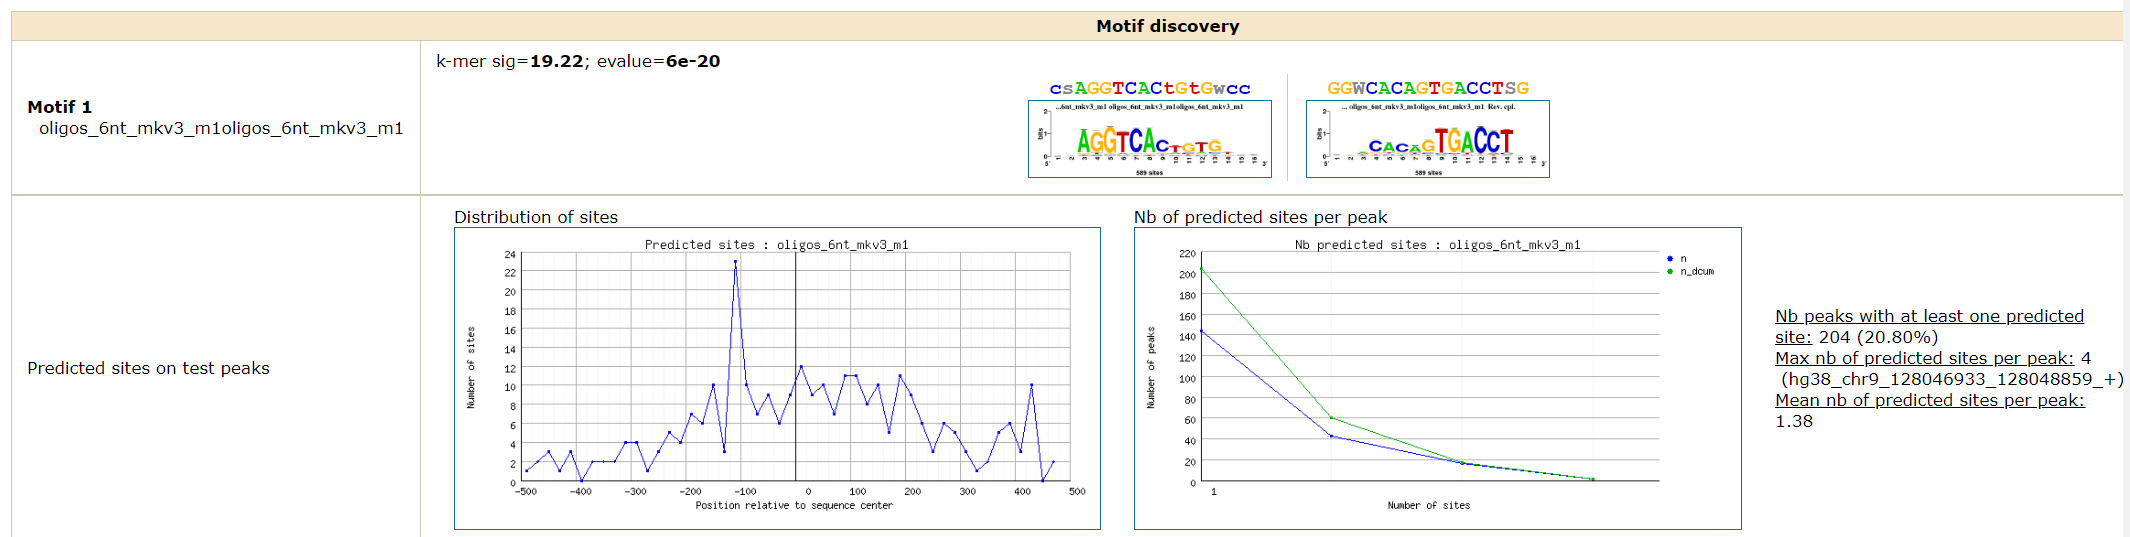

### The motif shows at chr9:128,046,933-128,048,859, which is shown in igv
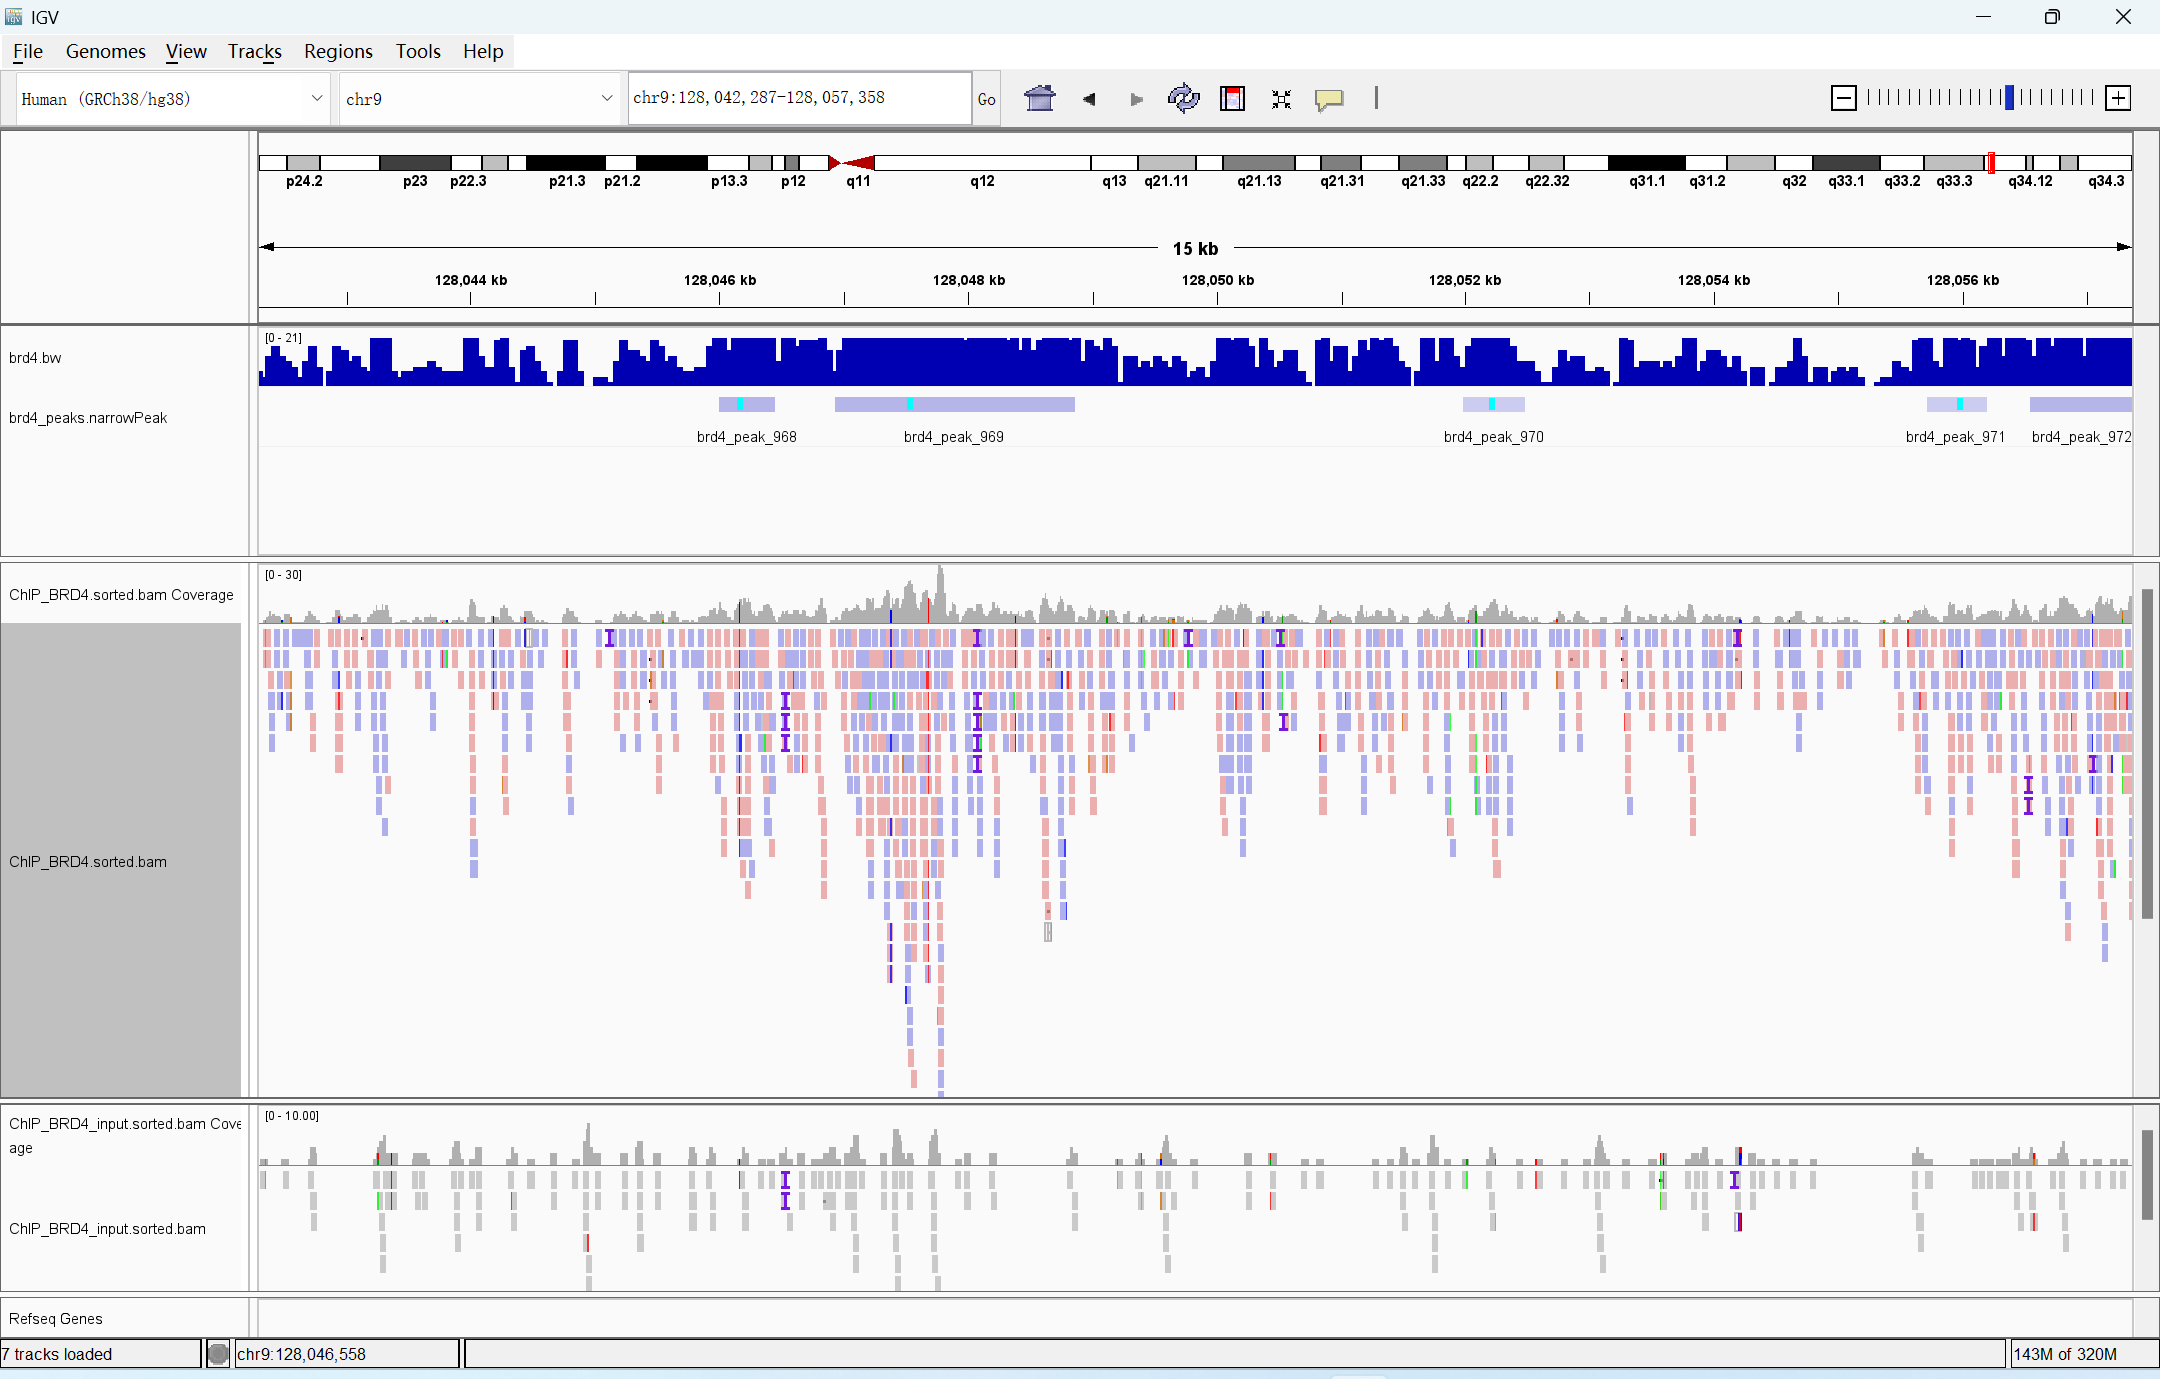


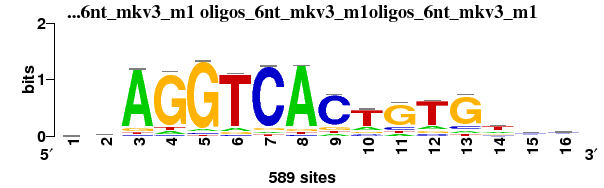

### The other two top motifys are shown here with around 38% and 10% 

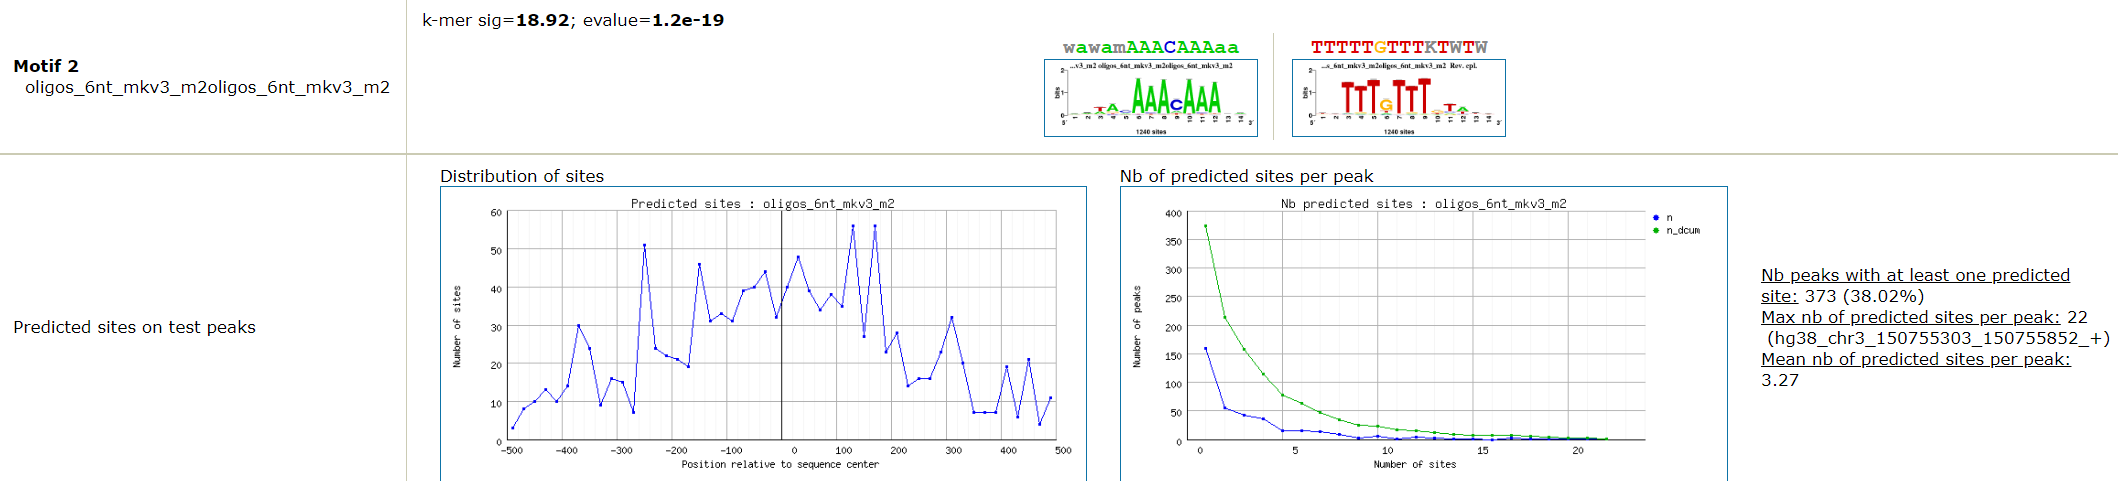


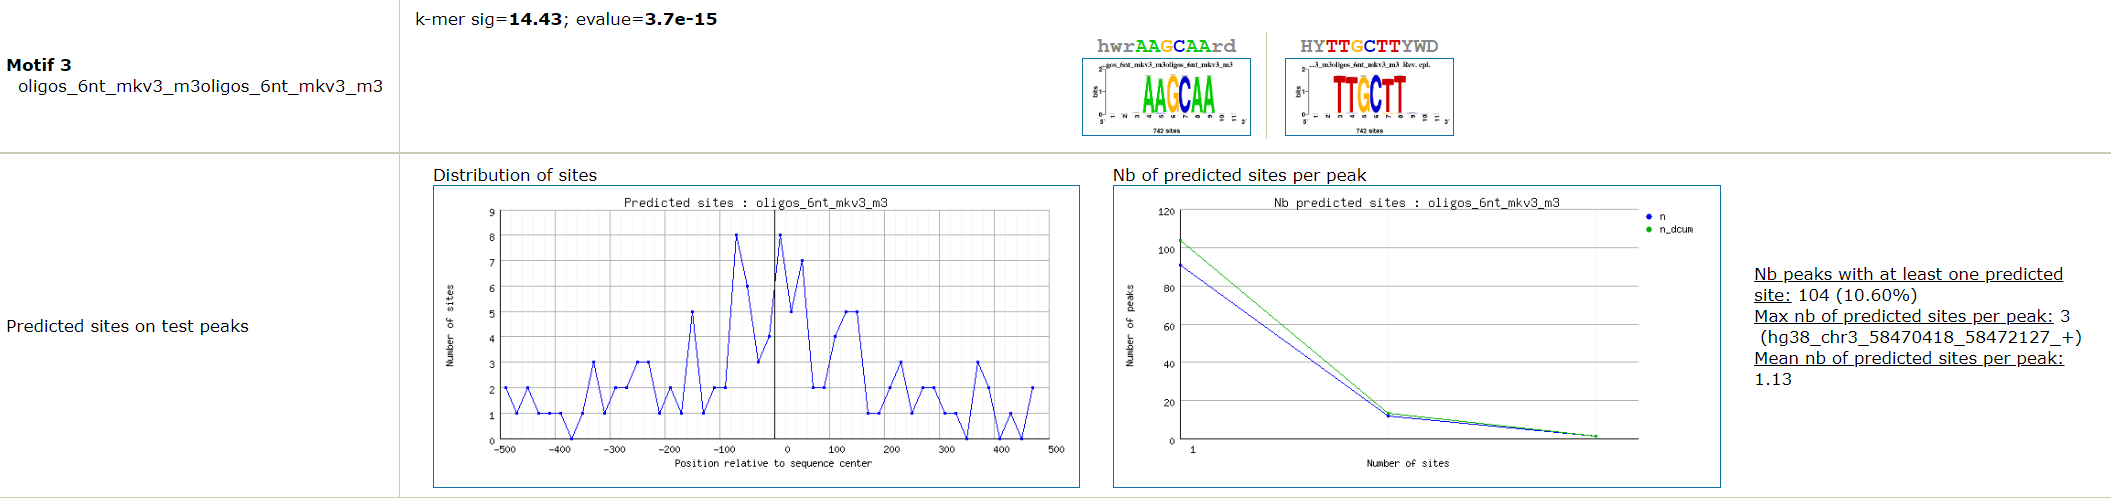

In [41]:
cat peak-motifs_oligos_6nt_mkv3_m1_sites.tab | grep -v ";" | grep -v '#' | head

hg38_chr1_9950413_9950768_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	11	26	ACAGGTCACCCTGGCC	8.6
hg38_chr1_16608284_16608933_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	117	132	CCGGGTCACCGGGAAC	8.7
hg38_chr1_17520670_17521056_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-164	-149	GCAGGTCACGGCAACC	8.2
hg38_chr1_17521317_17521882_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	259	274	TTAGGTGACTGTGTGA	9.2
hg38_chr1_41867658_41869333_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-115	-100	TCATGACACTGTGTAT	8.3
hg38_chr1_51321424_51321938_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-164	-149	GCAAGTCACAGTGACC	8.9
hg38_chr1_51321424_51321938_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	-161	-146	CAAGGTCACTGTGACT	12.3
hg38_chr1_145708068_145708946_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	-165	-150	TGAGGTCACCCAGTCC	7.8
hg38_chr1_177448665_177449785_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-299	-284	CCGTGTCACTGTGACC	9.9
hg38_chr1_177448665_177449785_+	site	oligos_6nt_mkv3_m1oligo

## Create a BED file with only the DIRECT peaks = peaks with the first three motif

Since BRD4 is a regulator for multiple regions, here integrated first 3 motifs' peak together

In [42]:
cat peak-motifs_oligos_6nt_mkv3_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 | head

chr1	9950413	9950768
chr1	16608284	16608933
chr1	17520670	17521056
chr1	17521317	17521882
chr1	41867658	41869333
chr1	51321424	51321938
chr1	51321424	51321938
chr1	145708068	145708946
chr1	177448665	177449785
chr1	177448665	177449785


In [28]:
cat peak-motifs_oligos_6nt_mkv3_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > brd4-motif1.txt

In [29]:
cat peak-motifs_oligos_6nt_mkv3_m2_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > brd4-motif2.txt

In [30]:
cat peak-motifs_oligos_6nt_mkv3_m3_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > brd4-motif3.txt

In [34]:
ls brd4-motif*
sort brd4-motif1.txt  brd4-motif2.txt  brd4-motif3.txt | uniq > brd4-allpeaks-with-motif-RSAT.txt

brd4-motif1.txt  brd4-motif2.txt  brd4-motif3.txt


## there are something wrong with the BED file, remove those lines 
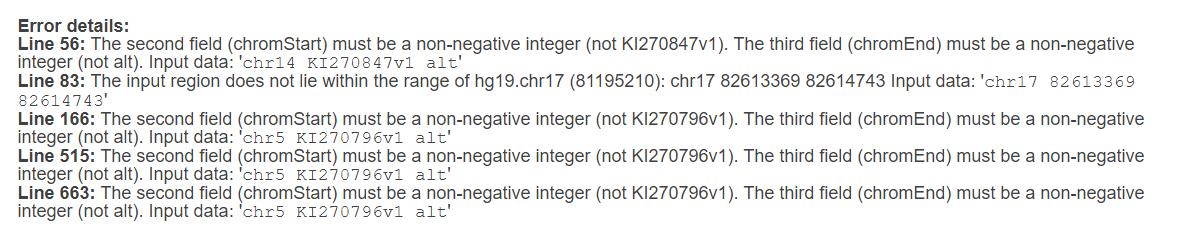

In [35]:
sed '/alt/d' brd4-allpeaks-with-motif-RSAT.txt > brd4-allpeaks-with-motif-RSAT2.txt

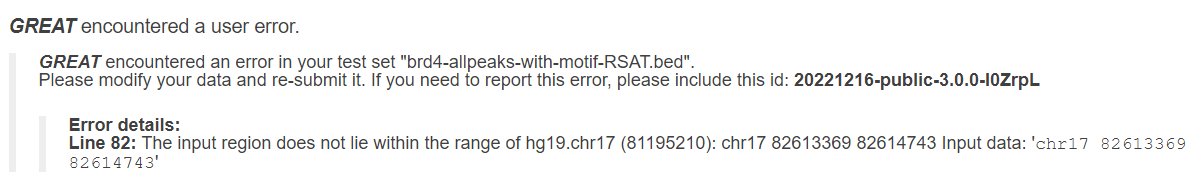

In [37]:
sed '/chr17\s82613369\s82614743/d' brd4-allpeaks-with-motif-RSAT2.txt > brd4-allpeaks-with-motif-RSAT.bed

## PWM and track enrichment

### It was reported that there was no peaks identified in the top 10

### so I decided to do analysis for three motifs separately!!!
[1671215885987.jpg](attachment:1671215885987.jpg)

In [38]:
cat brd4-motif1.txt > brd4-onepeak-with-motif-RSAT.bed

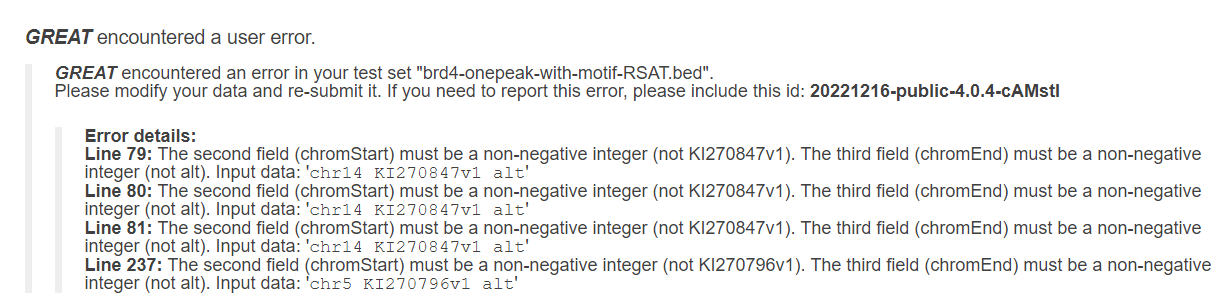

In [41]:
sed '/alt/d' brd4-motif1.txt > brd4-motif11.txt
cat brd4-motif11.txt > brd4-onepeak-with-motif-RSAT.bed

### The binding sequences match the result before and it was annotated as ESR1/ESR2 motif, which is consistent with the description in the paper

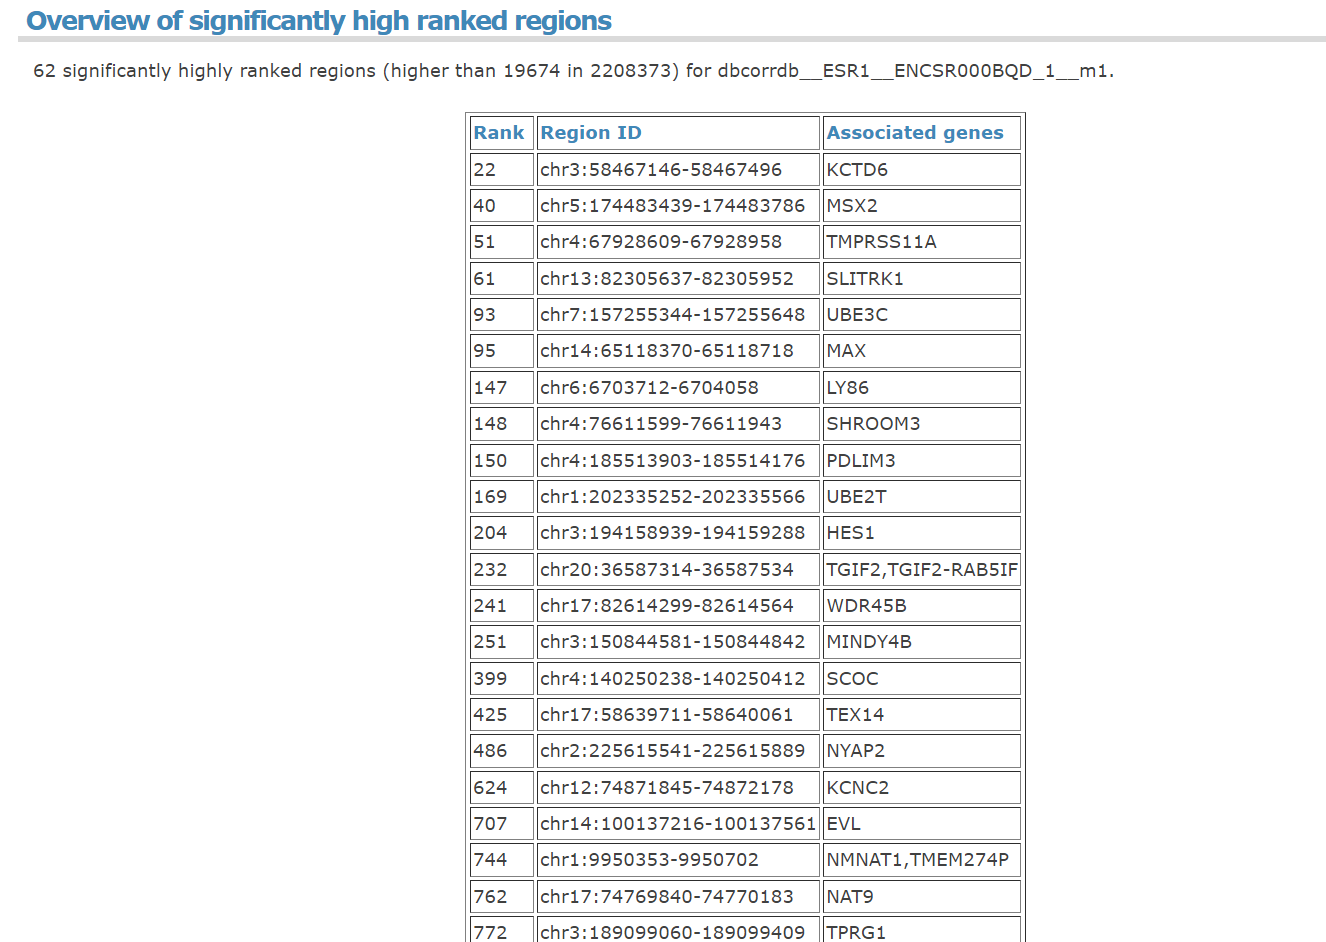

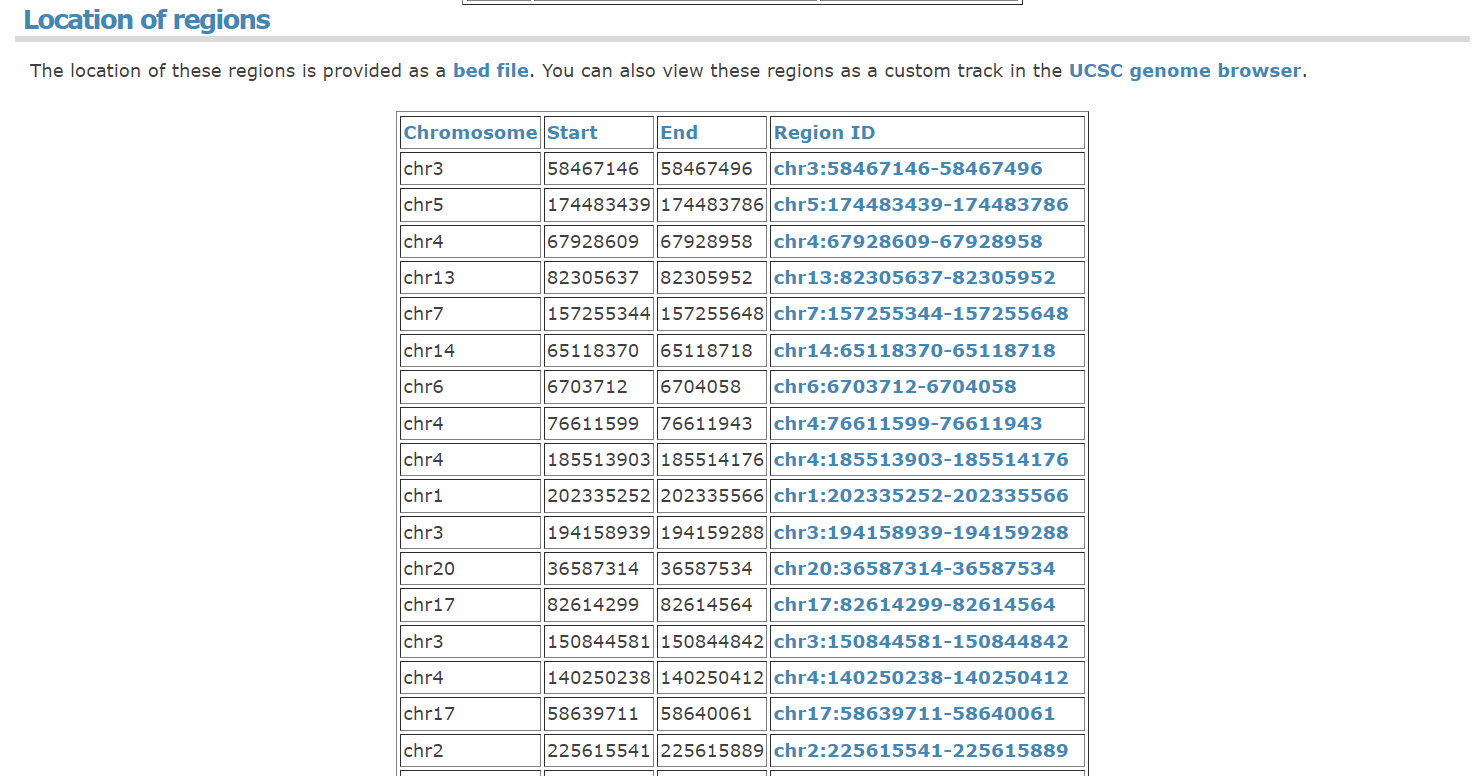

In [52]:
cat dbcorrdb__ESR1__ENCSR000BQD_1__m1.targets.bed | wc -l
head dbcorrdb__ESR1__ENCSR000BQD_1__m1.targets.bed 

62
track name=dbcorrdb__ESR1__ENCSR000BQD_1__m1_candidate_targets description="" useScore=1
chr11	101441725	101442073	chr11:101441725-101442073
chr6	6703712	6704058	chr6:6703712-6704058
chr2	11539408	11539751	chr2:11539408-11539751
chr1	193919881	193920163	chr1:193919881-193920163
chr4	76611599	76611943	chr4:76611599-76611943
chr2	11482035	11482363	chr2:11482035-11482363
chr9	128022134	128022471	chr9:128022134-128022471
chr4	140250238	140250412	chr4:140250238-140250412
chr22	28813727	28814062	chr22:28813727-28814062


In [50]:
sed '/alt/d' brd4-motif2.txt > brd4-motif22.txt
cat brd4-motif22.txt > brd4-onepeak2-with-motif-RSAT.bed

Similar results were observed for the secodn peaks region
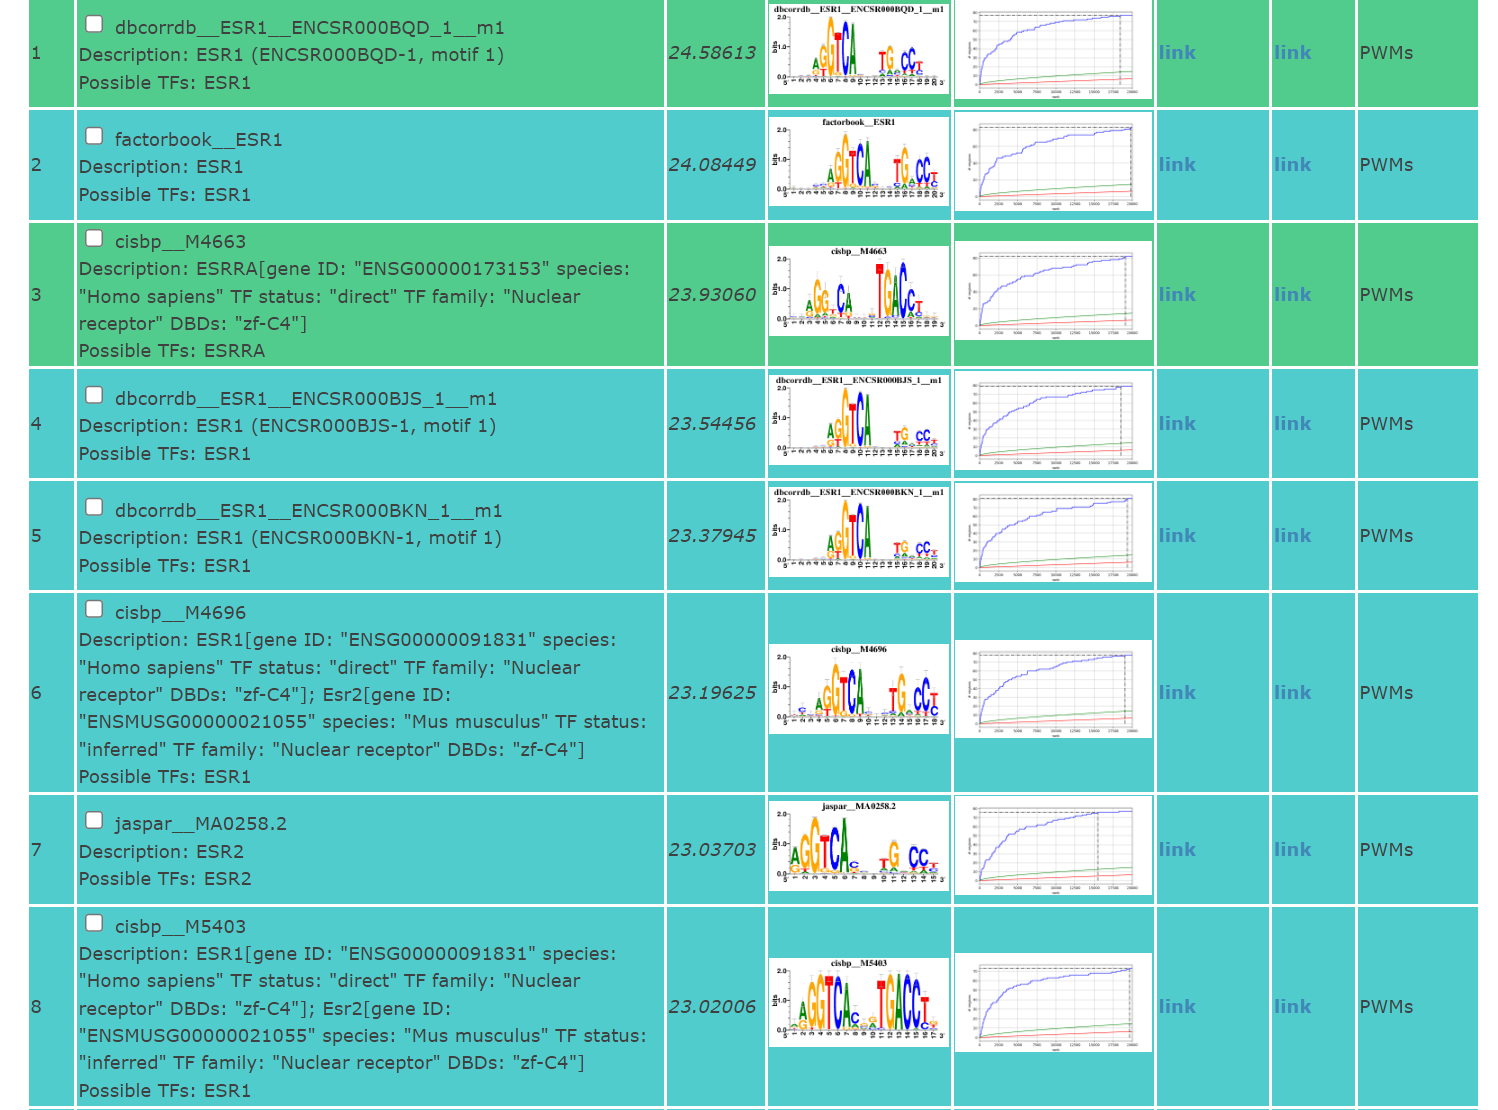

In [43]:
sed '/alt/d' brd4-motif3.txt > brd4-motif33.txt
cat brd4-motif33.txt > brd4-onepeak3-with-motif-RSAT.bed

### Same for the third one
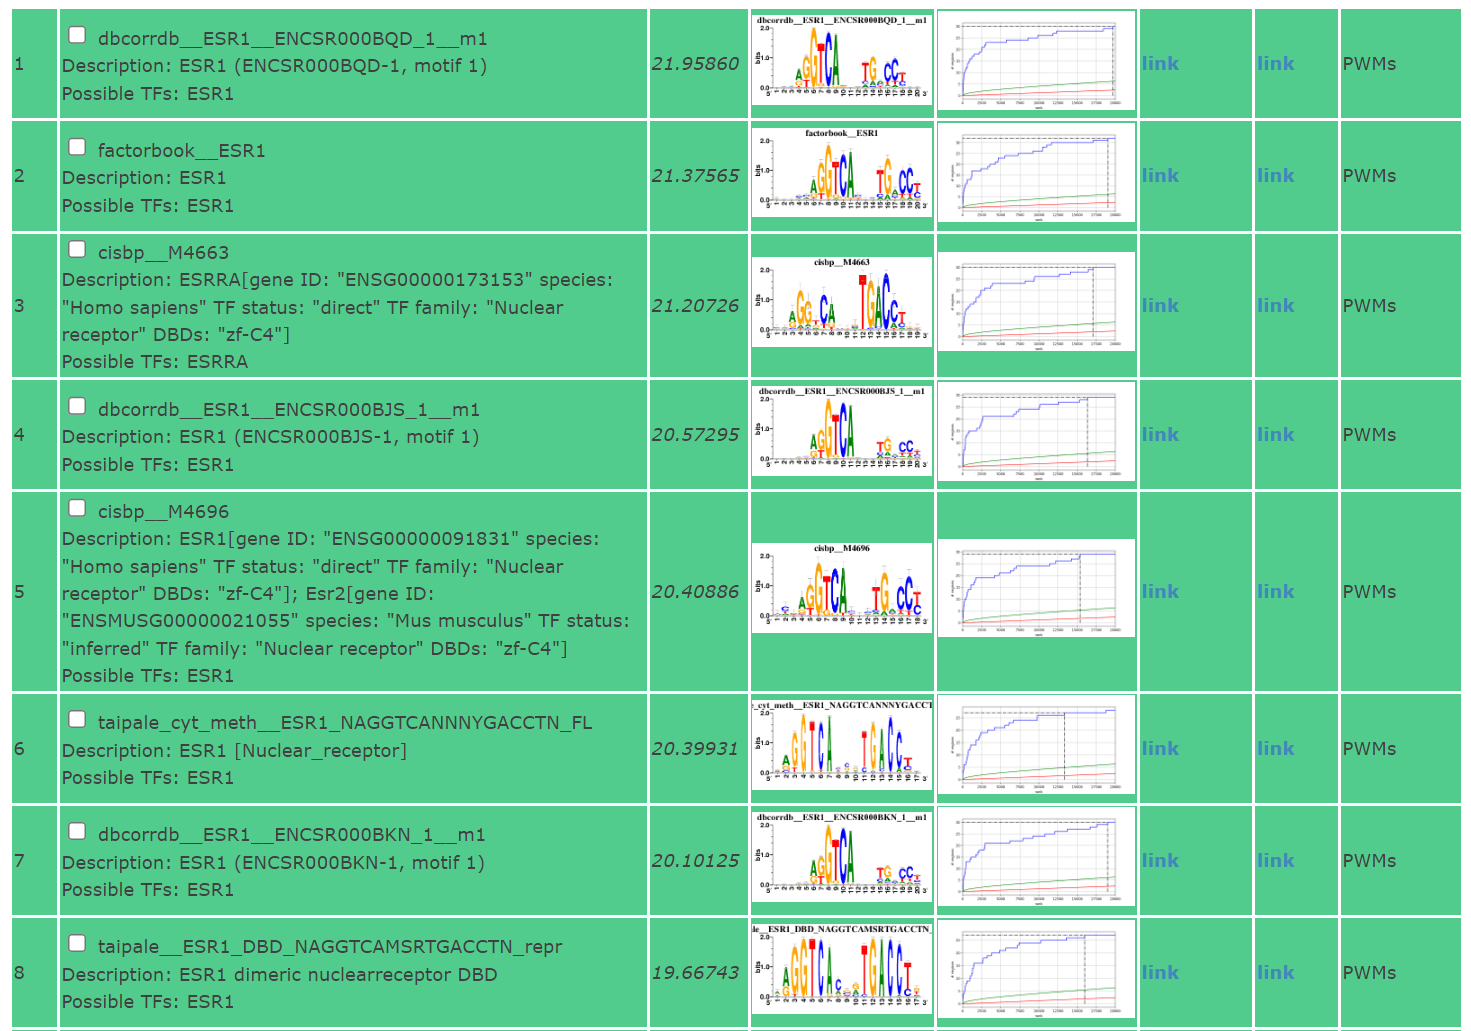

## Link Peaks to Genes

A distance of 100kb is set between peak and gene here, since BRD4 is a regulator to bind with various regions

## for the first motif

It is shown that this protein is highly responsible for regulating DNA binding and transcription, which is aligned with the paper that ERD4 is a regulator for the ERα occupied super-enhancer
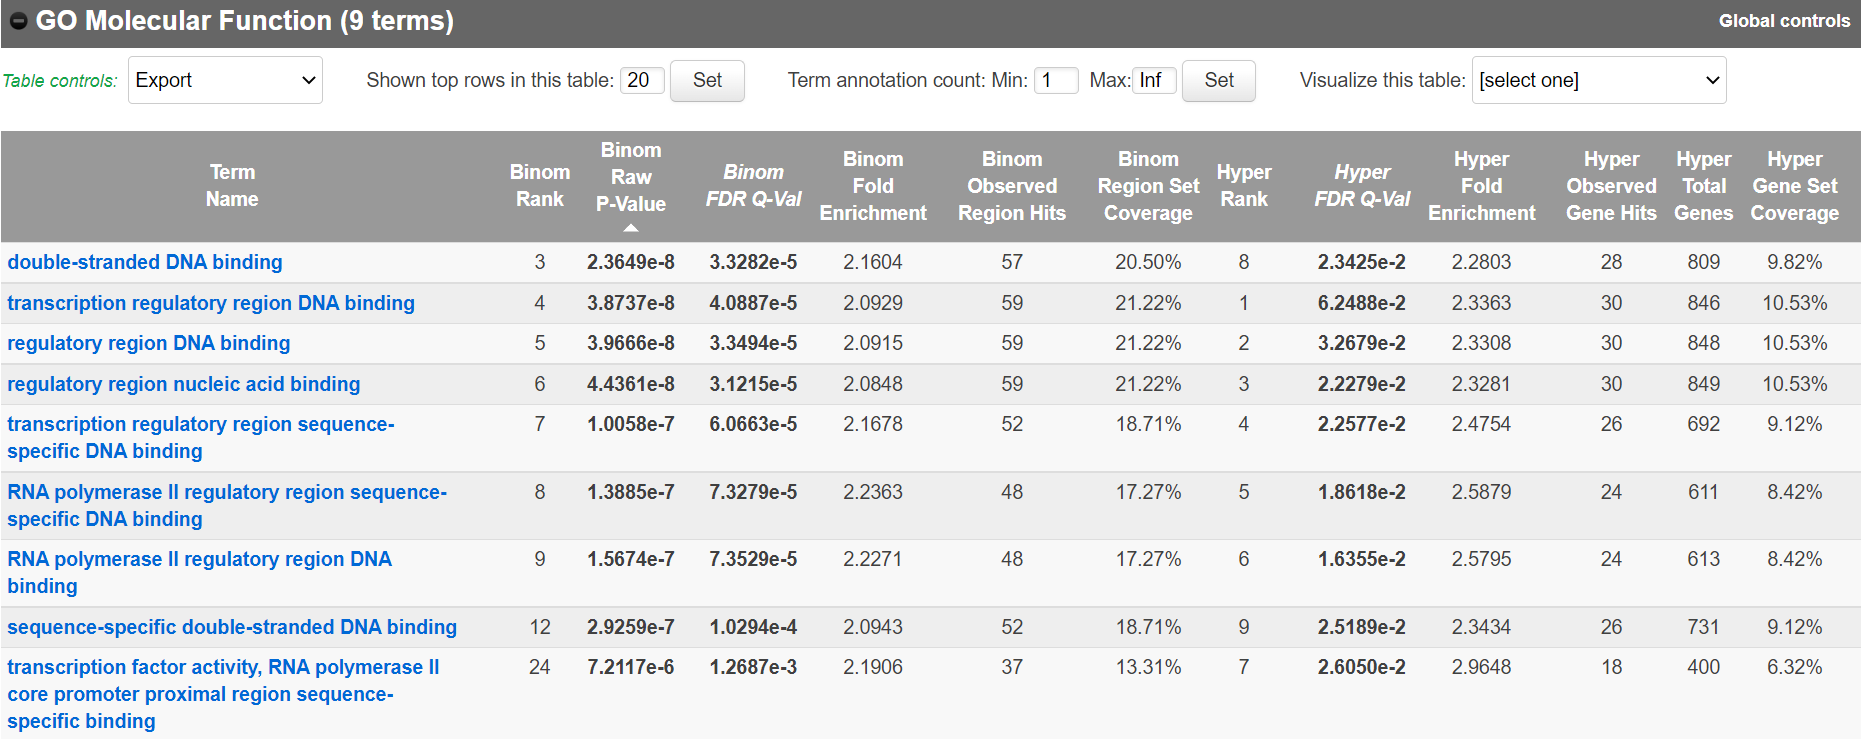

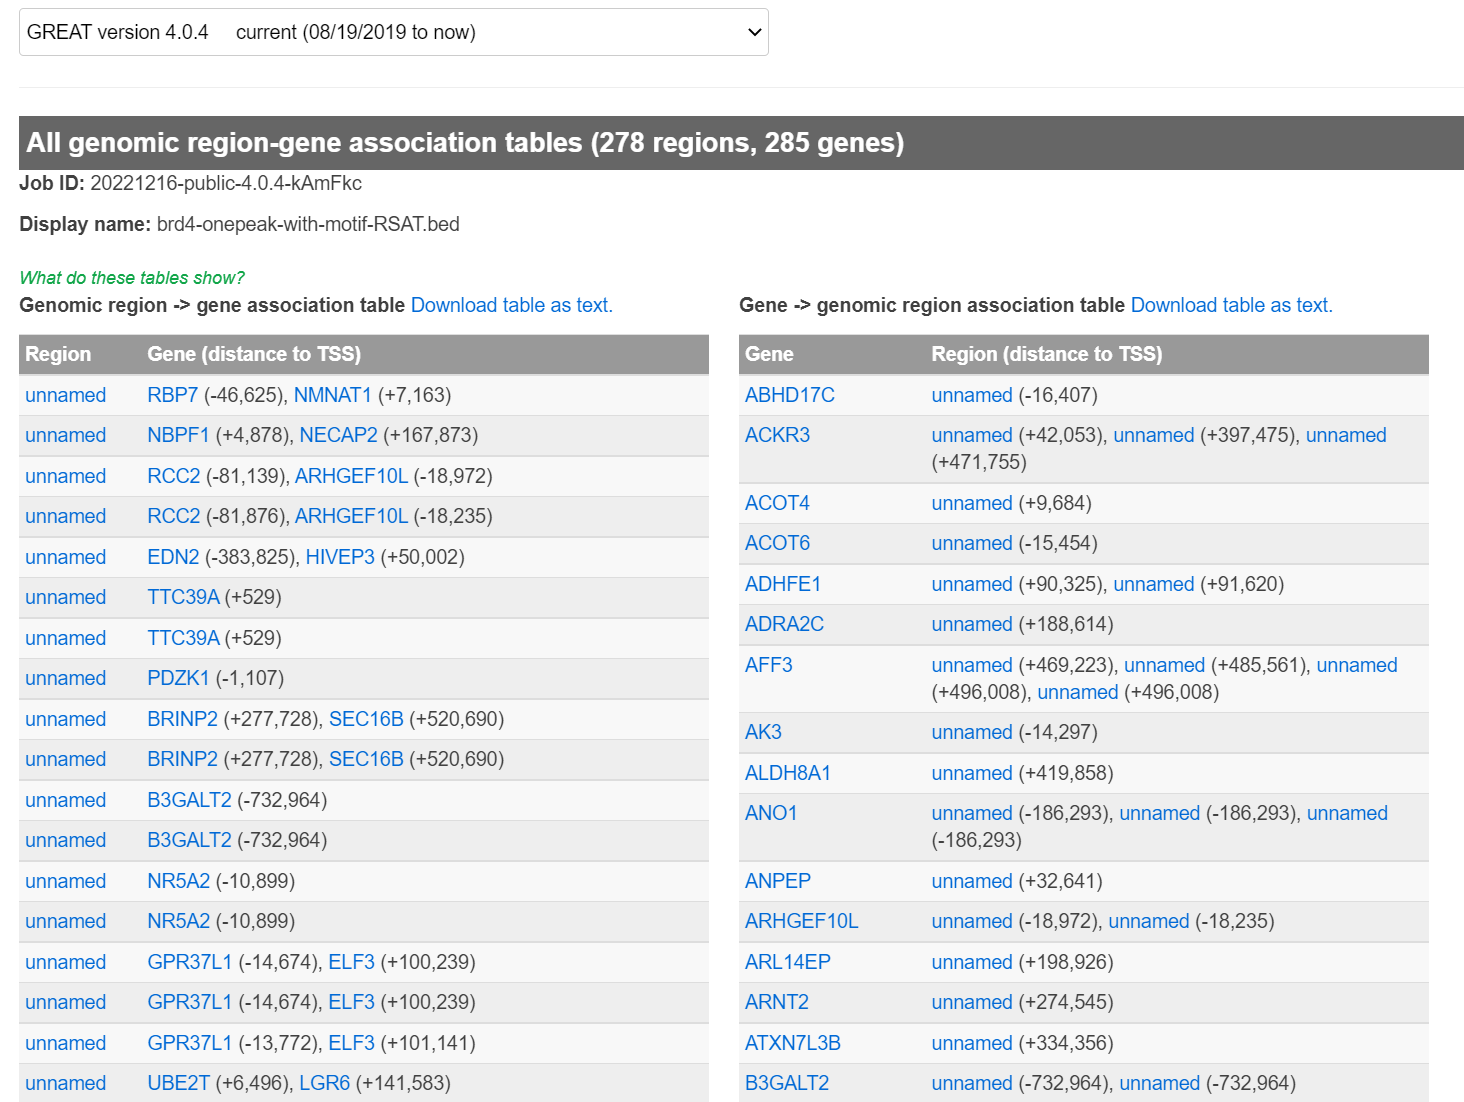

In [53]:
head 20221216-public-4.0.4-kAmFkc-hg38-all-gene.txt

# GREAT version 4.0.4	Species assembly: hg38	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
ABHD17C	unnamed (-16407)
ACKR3	unnamed (+42053), unnamed (+397475), unnamed (+471755)
ACOT4	unnamed (+9684)
ACOT6	unnamed (-15454)
ADHFE1	unnamed (+90325), unnamed (+91620)
ADRA2C	unnamed (+188614)
AFF3	unnamed (+469223), unnamed (+485561), unnamed (+496008), unnamed (+496008)
AK3	unnamed (-14297)
ALDH8A1	unnamed (+419858)


In [54]:
cat 20221216-public-4.0.4-kAmFkc-hg38-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

286


In [69]:
cat 20221216-public-4.0.4-kAmFkc-hg38-all-gene.txt | cut -f 1 | grep -v '#' > BRD4-targets1-GREAT.txt

### similar results can also be obtained by second peak regions
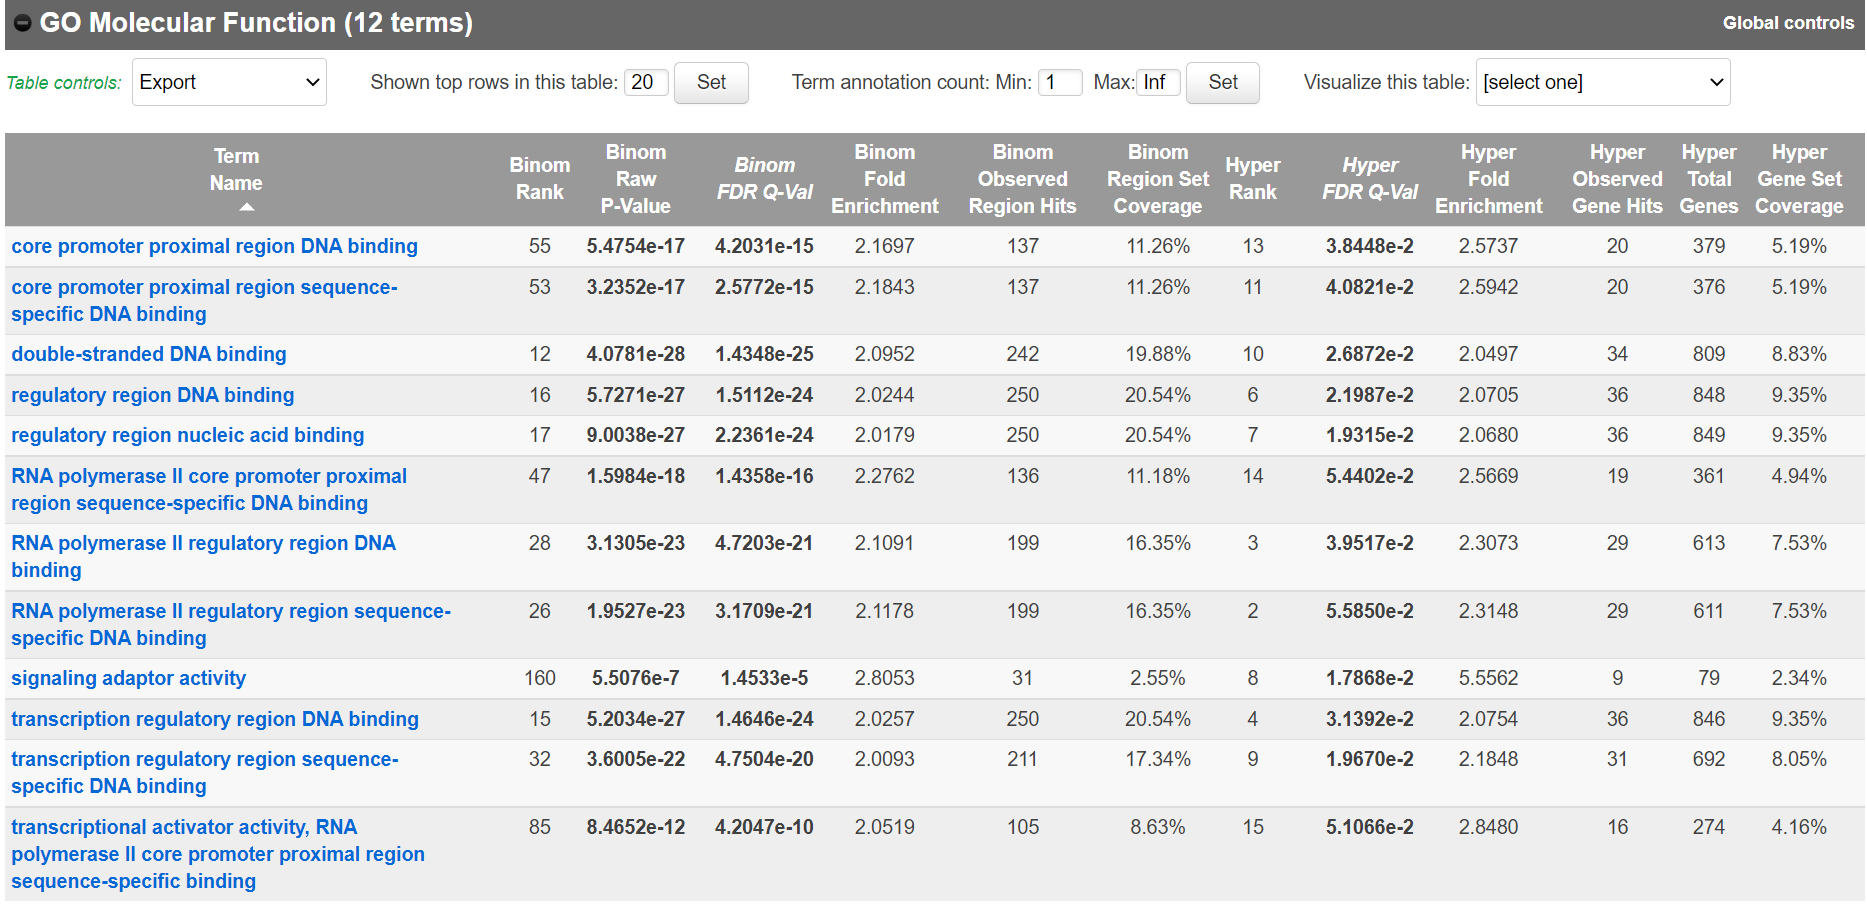

In [56]:
head 20221216-public-4.0.4-g2DFOx-hg38-all-gene.txt

# GREAT version 4.0.4	Species assembly: hg38	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
ABHD17C	unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407), unnamed (-16407)
ACKR3	unnamed (+398047), unnamed (+471755)
ACOT4	unnamed (+9684)
ACOT6	unnamed (-15454)
ADCY9	unnamed (-36100), unnamed (-36100), unnamed (-36100), unnamed (-36100), unnamed (-36100), unnamed (-36100), unnamed (-27483), unnamed (-27483), unnamed (-27483), unnamed (-27483), unnamed (-27483)
ADHFE1	unnamed (+88062), unnamed (+88062), unnamed (+88062), unnamed (+88062), unnamed (+88062), unnamed (+88062), unnamed (+88062), unnamed (+90325), unnamed (+92126)
AFF3	unnamed (-185101), unnamed (-185101), unnamed (-185101), unnamed (+469223), unnamed (+485561), unnamed (+485561), u

In [57]:
cat 20221216-public-4.0.4-g2DFOx-hg38-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

386


In [68]:
cat 20221216-public-4.0.4-g2DFOx-hg38-all-gene.txt | cut -f 1 | grep -v '#' > BRD4-targets2-GREAT.txt

### while the third peak region didn't get any annotation, we just leave it here
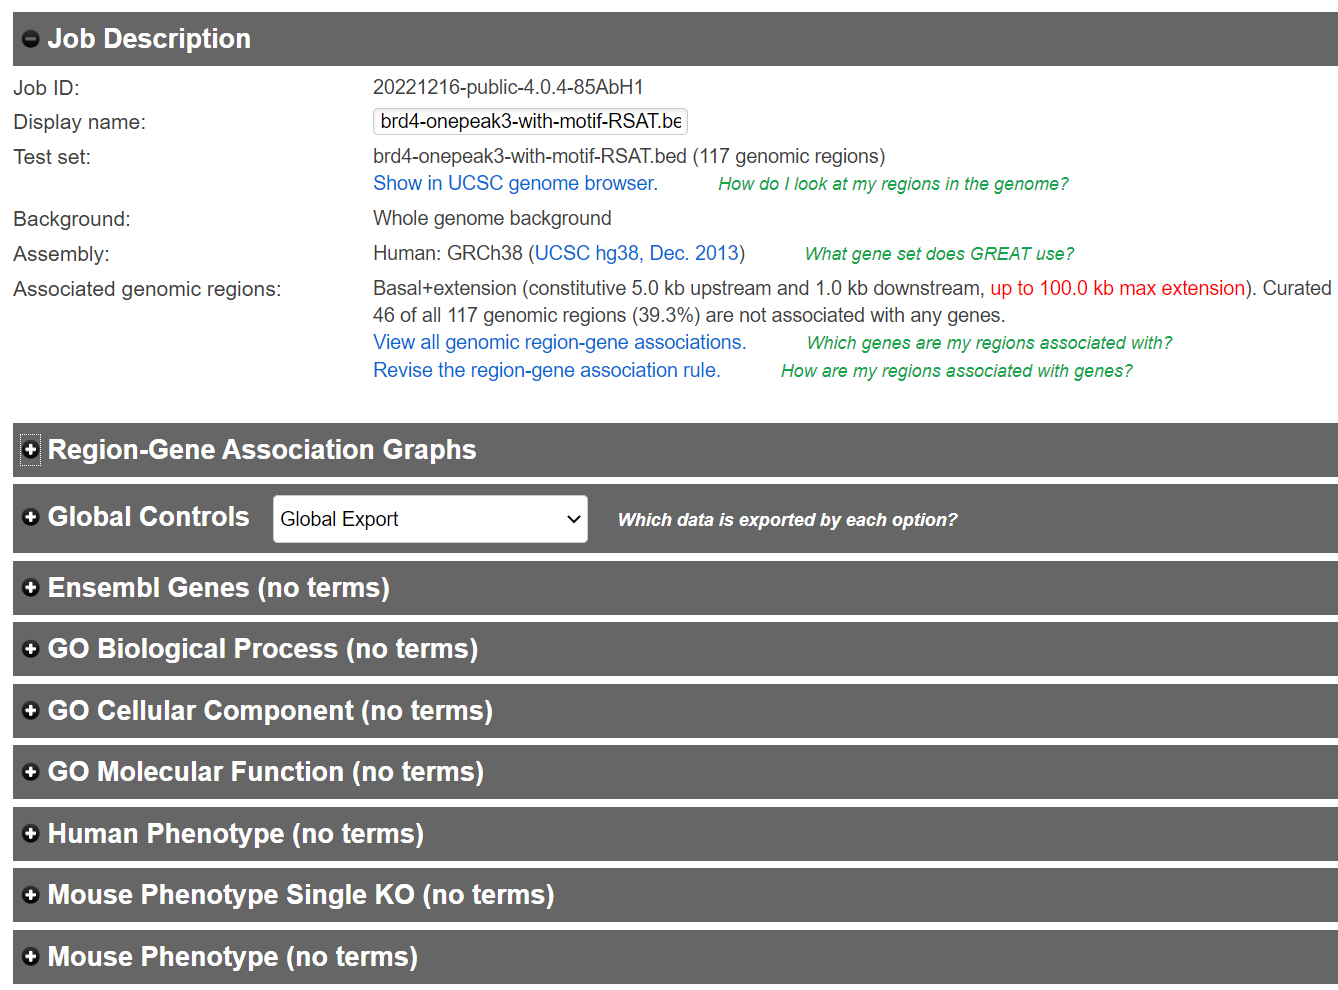

## STRING database

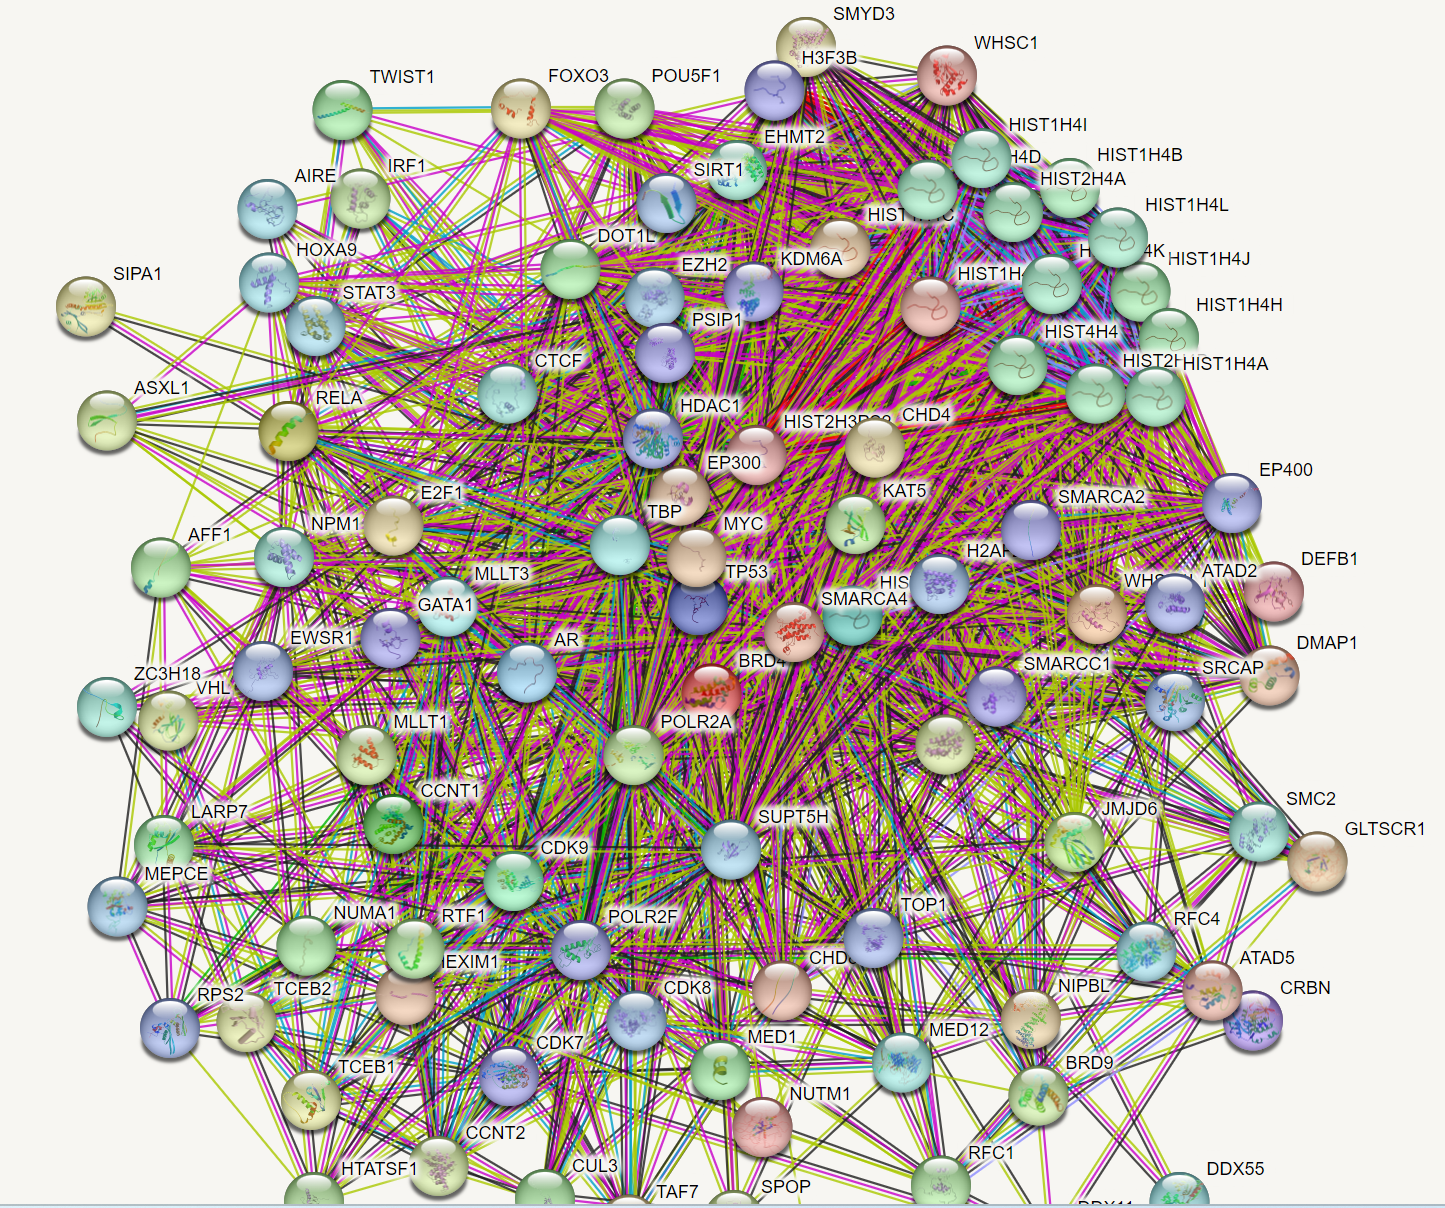

In [87]:
cat string_interactions.tsv | cut -f1 | uniq | wc -l

102


In [70]:
ls BRD4-targets*-GREAT.txt

BRD4-targets1-GREAT.txt  BRD4-targets2-GREAT.txt


In [71]:
sort BRD4-targets1-GREAT.txt  BRD4-targets2-GREAT.txt | uniq > BRD4-targets-GREAT.txt
head BRD4-targets-GREAT.txt


ABHD17C
ACKR3
ACOT4
ACOT6
ADCY9
ADHFE1
ADRA2C
AFF3
AHI1


In [72]:
wc -l BRD4-targets-GREAT.txt

459 BRD4-targets-GREAT.txt


In [80]:
cat string_interactions.tsv | cut -f1 | uniq > string_interactions.txt
wc -l string_interactions.txt

102 string_interactions.txt


In [83]:
list=`cat string_interactions.txt`

In [84]:
for i in $list; do grep -w $i BRD4-targets-GREAT.txt; done

IRF1
MYC


: 1

### Only two genes are overlapped with STRING database! It is reasonable because BRD4 is a regulator for ERα super enhancers but it does not target at genes directly.

# Summary

A Chip-seq analysis was down for the bromodomain protein BRD4 to investigate its regulatory landscape with high quality of reads. A wide range of peaks were found in the human genome, indicating BRD4's wide unspecific regulator property.For example, it was found that there are many peaks in the vicinity of genes (TFF1, SIAH2, CCND1 and MYC). Even with the false discovery rate of 0.001, 981 peaks were found. Two heatmap plots reconfirm that BRD4 do not bind to one specific region.

Among those peaks region, the top one motif was found with the recognized sequence: AGGTCACTGTC. Since BRD4 is multi-region regulator, PWM and track enrichment analysis was done by merging peaks that locate near top 3 motifs together, which gave a nonsense result. Then those peaks near top 3 motifs regions were analysed for PWM and track enrichment separately. Results showed that BRD4 might be the transcription factor for ESR1/2 genes, which is consistent with the information in paper.

GREST database provides highly associated genes for those peaks we are interested in. Those peaks were annotated mostly for regulating DNA binding and transcription, which is exactly an enhancer do!

Finally, STRING database was used to find the overlapped genes with our own result, which only gives two genes. Indeed, since BRD4 is a regulator for the ERα-occupied super-enhancers, normally, it will not target at genes directly. It will be more meaningful to do search in the enhancer database, but I didn't manage to find a good one.
